### **Problem Statement: Bank Credit Card Fraud Detection**

Problem Statement: Bank Credit Card Fraud Detection
With the increasing volume of digital credit card transactions, the risk of fraudulent activities is growing rapidly, causing significant financial losses to banks and customers alike. Traditional manual methods of detecting fraud are time-consuming, prone to human error, and cannot scale to the vast amount of real-time transactions. Moreover, fraudsters are continually evolving their tactics, making it challenging to keep up using conventional methods.

Machine learning offers an effective solution by automatically analyzing large volumes of transaction data in real time, detecting complex patterns, and adapting to emerging fraud tactics. Machine learning models can efficiently identify subtle fraud indicators and outliers that manual checks might overlook. By implementing machine learning, banks can significantly reduce fraud-related losses, prevent financial damage to their customers, and increase operational efficiency. This not only saves time but also provides monetary gains by preventing fraud before it happens, thus minimizing compensation payouts, reducing investigation costs, and improving customer trust and retention.

### **Data Understanding**


The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

The data set has also been modified with component principal components analysis (PCA) to maintain confidentiality. Apart from 'amount' and 'time' , all other features(V1,V2 upto V28) are the principal components obtained using PCA.The feature 'time' contains the time elapsed between the first transaction and subsequent transactions.The feature 'amount' is the transaction amount.The feature 'class' represents class labelling and it takes value of 1 in case of fraud and 0 in others.




### **Importing Dependencies**

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm,skew
#from scipy.special import boxcoxlp
#from scipy.stats import boxcox_normax
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,roc_auc_score
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.metrics import average_precision_score ,precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

from sklearn.linear_model import Ridge,Lasso,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.ensemble import AdaBoostClassifier
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#mounting the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#loading the data
df=pd.read_csv('/content/gdrive/MyDrive/Upgrad - Credit Card Fraud Detection /creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#checking the shape
df.shape

(284807, 31)

In [ ]:
#checking the datatypes and null distribution
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**The data does not contain any null values**


In [ ]:
#Checking the distribution of numerical values in the dataset.
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#checking the class distribution of the target variable.
df['Class'].value_counts()

,count
Class,
0,284315
1,492


Class
0    99.827251
1     0.172749
Name: Class, dtype: float64


<Axes: ylabel='Class'>

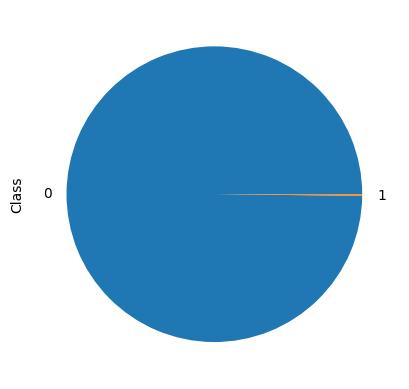

In [ ]:
#checking the class dictribution of the target variable in percentage
print((df.groupby('Class')['Class'].count()/df['Class'].count())*100)
((df.groupby('Class')['Class'].count()/df['Class'].count())*100).plot.pie()


In [ ]:
#checking the % distribution of normal vs fraud
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
print(normal_share)
print(fraud_share)

99.82725143693798
0.1727485630620034


The dataset exhibits a highly imbalanced distribution between normal and fraudulent transactions. Specifically, 99.83% of the transactions are legitimate, while only 0.17% are fraudulent. This significant imbalance poses a challenge for building an effective fraud detection model because most machine learning algorithms assume a balanced class distribution.

In imbalanced datasets like this, models may become biased toward predicting the majority class (normal transactions) and may fail to accurately identify fraudulent transactions. Therefore, specialized techniques are used.

In [ ]:
#create a bar plot for fraudulent and non-fraudulent transactions
plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count",fontsize=18)
plt.xlabel('Record Counts By Class',fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()

In [ ]:
#checking the corelation
corr=df.corr()
corr


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,3.777823e-12,-2.118614e-12,-1.733159e-13,-3.473231e-12,-1.306165e-13,-1.116494e-13,2.114527e-12,3.016285e-14,...,-3.276238e-12,2.281863e-12,-2.969746e-12,-1.029876e-12,1.144179e-12,1.835263e-12,7.624804e-12,-9.769215e-13,-0.227709,-0.101347
V2,-0.010593,3.777823e-12,1.000000e+00,2.325661e-12,-2.314981e-12,-1.831952e-12,9.438444e-13,5.403436e-12,2.133785e-14,3.238513e-13,...,2.280202e-12,-2.548560e-13,-4.856120e-12,6.431308e-13,-9.423730e-13,-4.129100e-13,-9.856545e-13,2.525513e-12,-0.531409,0.091289
V3,-0.419618,-2.118614e-12,2.325661e-12,1.000000e+00,2.046235e-13,-4.032993e-12,-1.574471e-13,3.405586e-12,-1.272385e-12,-6.812351e-13,...,6.736294e-13,-8.909339e-13,4.147209e-12,3.407636e-12,5.712956e-13,-2.577274e-12,-5.041444e-12,5.189109e-12,-0.210880,-0.192961
V4,-0.105260,-1.733159e-13,-2.314981e-12,2.046235e-13,1.000000e+00,-2.552389e-13,1.084041e-12,8.135064e-13,7.334818e-13,-7.143069e-13,...,-2.696370e-12,4.347776e-13,-4.160969e-12,-2.368743e-12,1.619944e-12,-3.043100e-13,-1.456066e-12,-2.832372e-12,0.098732,0.133447
V5,0.173072,-3.473231e-12,-1.831952e-12,-4.032993e-12,-2.552389e-13,1.000000e+00,-6.934789e-14,1.573956e-11,-2.038243e-12,-1.000756e-12,...,-1.751796e-12,7.095269e-13,3.616075e-12,-2.808776e-13,1.451126e-12,-1.896141e-13,-2.124559e-12,1.010196e-11,-0.386356,-0.094974
V6,-0.063016,-1.306165e-13,9.438444e-13,-1.574471e-13,1.084041e-12,-6.934789e-14,1.000000e+00,-2.798968e-12,-5.446480e-13,2.036743e-12,...,1.476858e-12,-1.144797e-12,-1.527842e-12,1.551854e-12,-2.723707e-12,3.351239e-12,1.481307e-12,-6.069227e-13,0.215981,-0.043643
V7,0.084714,-1.116494e-13,5.403436e-12,3.405586e-12,8.135064e-13,1.573956e-11,-2.798968e-12,1.000000e+00,5.528803e-12,5.088082e-13,...,2.788246e-12,-8.133209e-13,-4.293094e-12,-2.553518e-12,-7.406970e-13,-4.476467e-12,-1.328637e-11,2.958679e-13,0.397311,-0.187257
V8,-0.036949,2.114527e-12,2.133785e-14,-1.272385e-12,7.334818e-13,-2.038243e-12,-5.446480e-13,5.528803e-12,1.000000e+00,-2.243172e-12,...,-4.022440e-12,-2.679560e-12,9.013064e-13,-1.074365e-12,-3.268979e-12,1.043839e-12,-3.499804e-12,1.866598e-12,-0.103079,0.019875
V9,-0.008660,3.016285e-14,3.238513e-13,-6.812351e-13,-7.143069e-13,-1.000756e-12,2.036743e-12,5.088082e-13,-2.243172e-12,1.000000e+00,...,3.040326e-12,-7.467526e-13,-1.011003e-12,8.579072e-13,-1.590341e-12,-7.723547e-13,2.428930e-12,-1.406856e-12,-0.044246,-0.097733


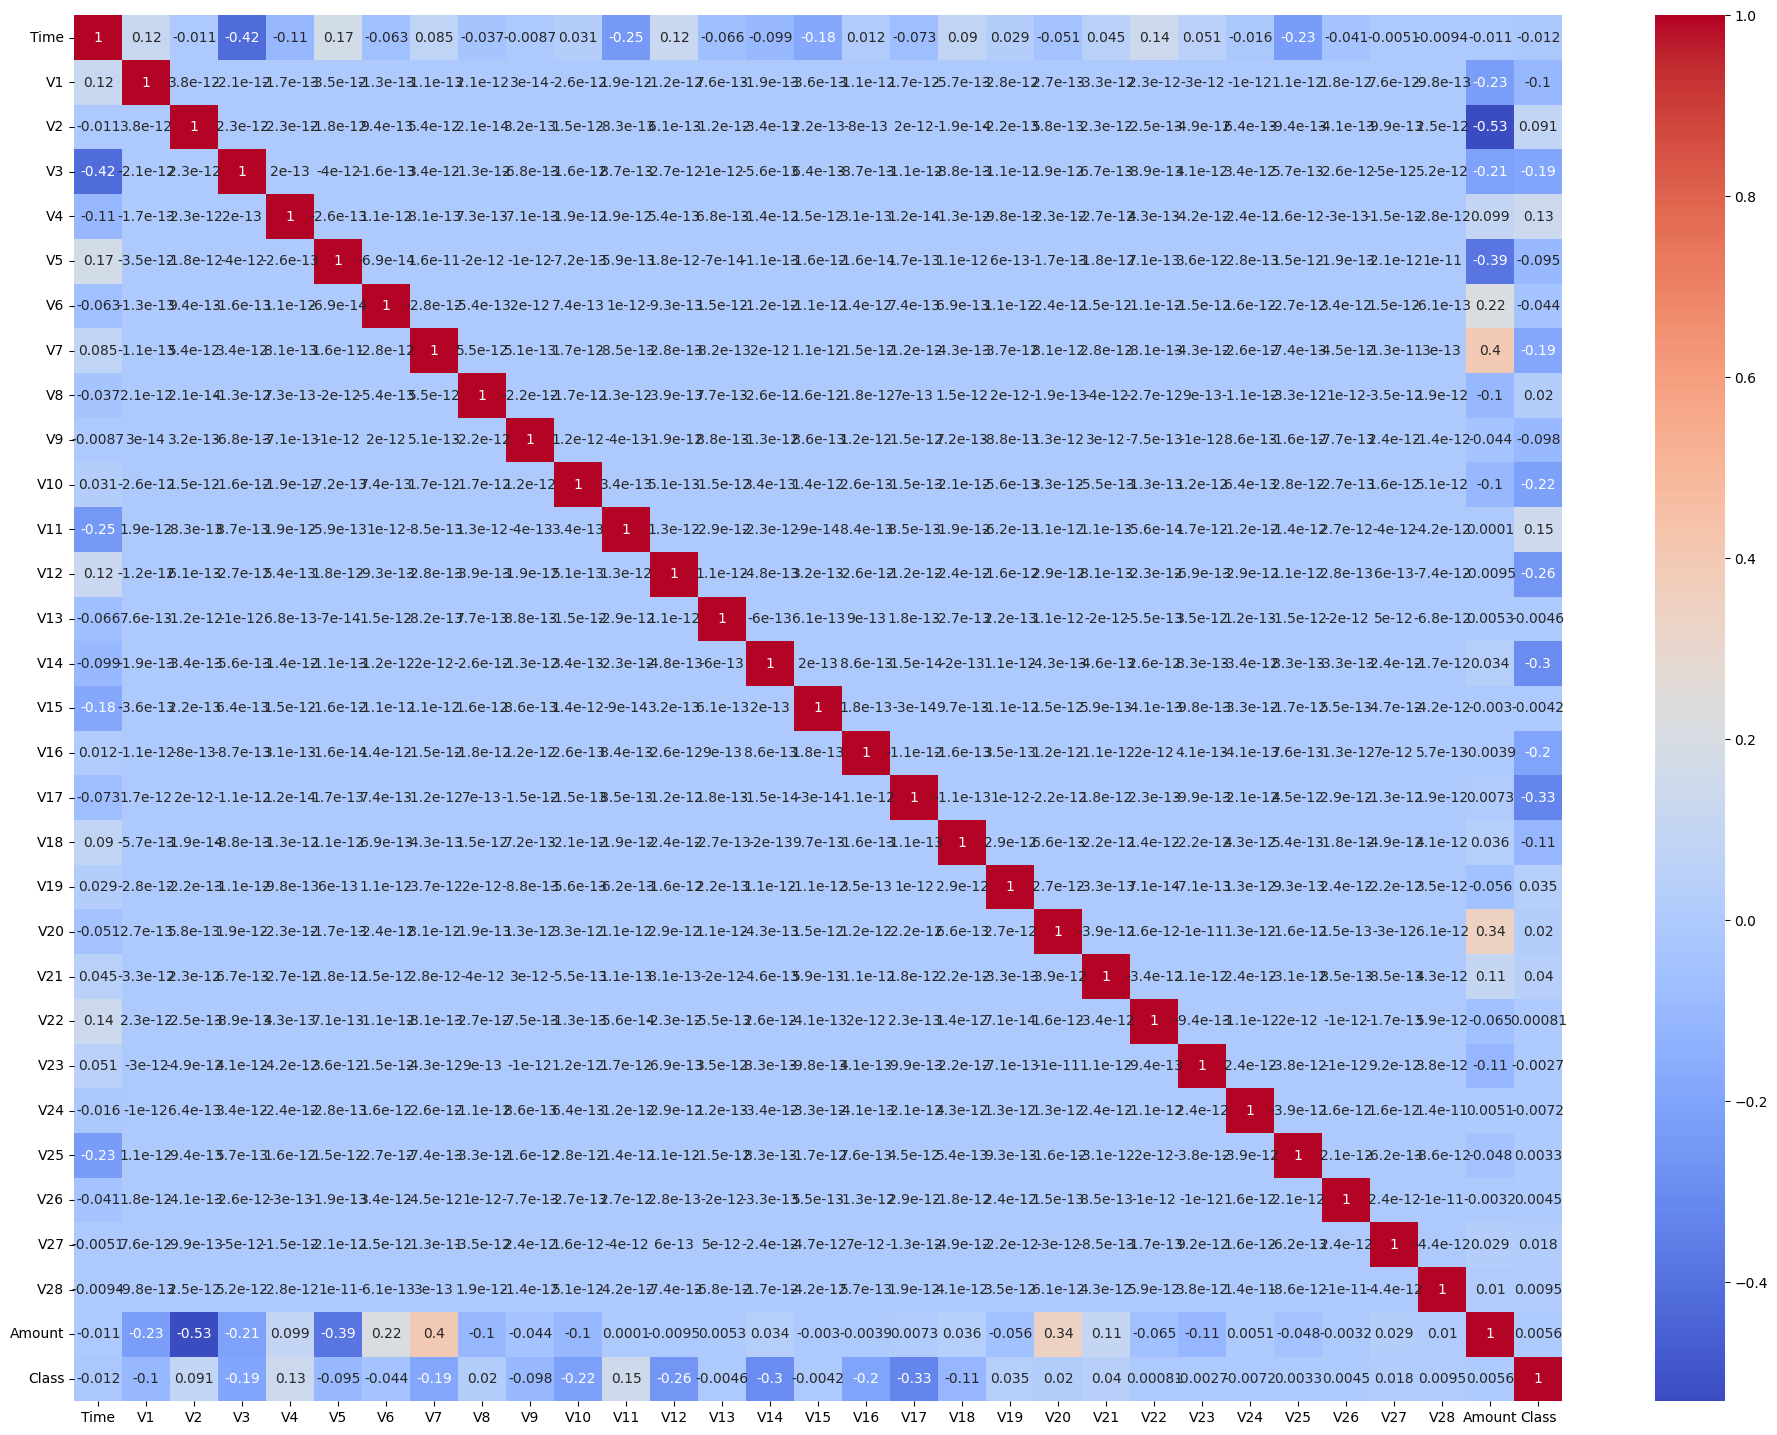

In [ ]:
#checking the correlation in heatmap
plt.figure(figsize=(24,18))
sns.heatmap(corr,cmap='coolwarm',annot=True)
plt.show()

In [ ]:
#As time is given in relative fashion, we are using pandas timeDelta which represent a duration(the difference between two timeframes)
Delta_time =pd.to_timedelta(df['Time'],unit='s')

#Create derived columns Mins and hours
df['Time_Day']=(Delta_time.dt.components.days).astype(int)
df['Time_Hour']=(Delta_time.dt.components.hours).astype(int)
df['Time_Min']=(Delta_time.dt.components.minutes).astype(int)

In [ ]:
df.tail(25)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Time_Day,Time_Hour,Time_Min
284782,172767.0,-0.268061,2.540315,-1.400915,4.846661,0.639105,0.186479,-0.045911,0.936448,-2.419986,...,-0.681794,-0.668894,0.044657,-0.066751,-0.072447,12.82,0,1,23,59
284783,172768.0,-1.796092,1.929178,-2.828417,-1.689844,2.199572,3.123732,-0.270714,1.657495,0.465804,...,0.721269,-0.529906,-0.240117,0.129126,-0.080620,11.46,0,1,23,59
284784,172768.0,-0.669662,0.923769,-1.543167,-1.560729,2.833960,3.240843,0.181576,1.282746,-0.893890,...,0.651122,1.073823,0.844590,-0.286676,-0.187719,40.00,0,1,23,59
284785,172768.0,0.032887,0.545338,-1.185844,-1.729828,2.932315,3.401529,0.337434,0.925377,-0.165663,...,0.688519,-0.460220,0.161939,0.265368,0.090245,1.79,0,1,23,59
284786,172768.0,-2.076175,2.142238,-2.522704,-1.888063,1.982785,3.732950,-1.217430,-0.536644,0.272867,...,0.632444,-0.201064,0.199251,0.438657,0.172923,8.95,0,1,23,59
284787,172769.0,-1.029719,-1.110670,-0.636179,-0.840816,2.424360,-2.956733,0.283610,-0.332656,-0.247488,...,0.107812,-0.935586,1.138216,0.025271,0.255347,9.99,0,1,23,59
284788,172770.0,2.007418,-0.280235,-0.208113,0.335261,-0.715798,-0.751373,-0.458972,-0.140140,0.959971,...,0.064819,-0.608337,0.268436,-0.028069,-0.041367,3.99,0,1,23,59
284789,172770.0,-0.446951,1.302212,-0.168583,0.981577,0.578957,-0.605641,1.253430,-1.042610,-0.417116,...,-0.038712,0.010209,-0.362666,0.503092,0.229921,60.50,0,1,23,59
284790,172771.0,-0.515513,0.971950,-1.014580,-0.677037,0.912430,-0.316187,0.396137,0.532364,-0.224606,...,0.000607,-0.376379,0.128660,-0.015205,-0.021486,9.81,0,1,23,59
284791,172774.0,-0.863506,0.874701,0.420358,-0.530365,0.356561,-1.046238,0.757051,0.230473,-0.506856,...,-0.003988,-0.113149,0.280378,-0.077310,0.023079,20.32,0,1,23,59


In [ ]:
#Drop unnecessary columns
#We will drop time column as we have derived day/hour/minutes from the time column
df.drop('Time',axis=1,inplace=True)
#We will keep only Hour column , as day and minutes will not be very useful.
df.drop(['Time_Day','Time_Min'],axis=1,inplace=True)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23


####Splitting the data into train and test data

In [ ]:
#Splitting the dataset into X and y
y=df['Class']
X=df.drop(['Class'],axis=1)

In [ ]:
y.head(5)

,Class
0,0
1,0
2,0
3,0
4,0


In [ ]:
X.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Time_Hour
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
#splitting the dataset using train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=100)

Preserve X_test and y_test to evaluate on the test data once we build the model

In [ ]:
#Checking the spread of data post split
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
396
96


#####ploting the distribution of variables

In [ ]:
#Accumulating all the column names under one variable
cols=list(X.columns.values)
cols

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Time_Hour']

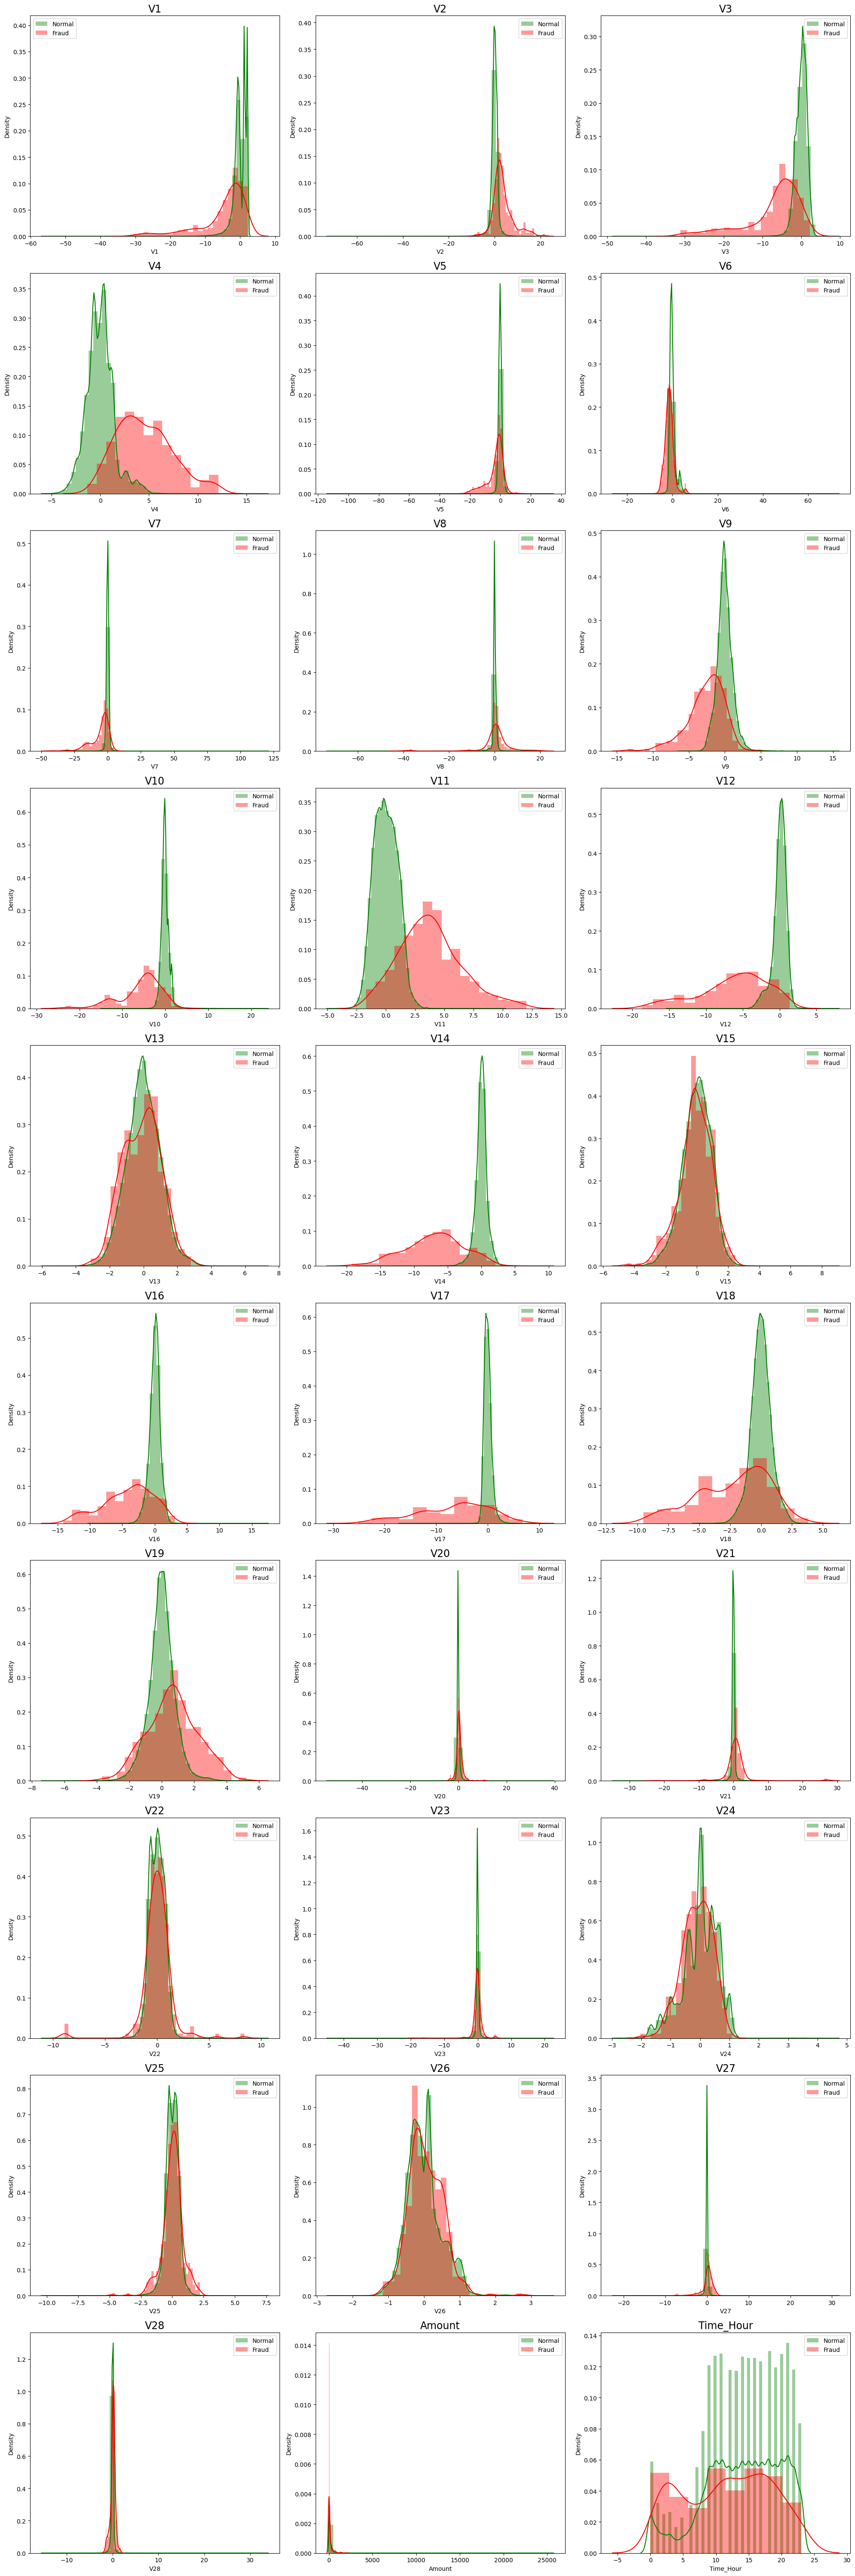

In [ ]:
# Assuming 'cols' contains the list of column names to be plotted
normal_records = df.Class == 0
fraud_records = df.Class == 1

plt.figure(figsize=(20, 60))

for n, col in enumerate(cols):
    plt.subplot(10, 3, n + 1)  # Create a 10x3 grid for subplots
    sns.distplot(X[col][normal_records], color='green',  label='Normal')  # Green for normal transactions
    sns.distplot(X[col][fraud_records], color='red', label='Fraud')  # Red for fraudulent transactions
    plt.title(col, fontsize=17)
    plt.legend()

# Show all the subplots after the loop
plt.tight_layout()
plt.show()

####Model Building

In [ ]:
#create a dataframe to store the results
df_Results=pd.DataFrame(columns=['Methodology','Model','Accuracy','roc_value','threshold'])

In [ ]:
#create a common function to plot confusion matrix
def plot_confusion_matrix(y_test,pred_test):
  cm=confusion_matrix(y_test,pred_test)
  plt.clf()
  plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Accent)
  categoryNames=['Non-Fraudulent','Fraudulent']
  plt.title('Confusion Matrix-Test Data')
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  ticks=np.arange(len(categoryNames))
  plt.xticks(ticks,categoryNames,rotation=45)
  plt.yticks(ticks,categoryNames)
  s=[['TN','FP'],['FN','TP']]

  for i in range(2):
    for j in range(2):
      plt.text(j,i,str(s[i][j])+" = "+ str(cm[i][j]),fontsize=12)
  plt.show()

In [ ]:
#create a common function to predict and fit on a logistic regression model for both L1 and L2
def buildAndRunLogisticModels(df_Results,Methodology,X_train,y_train,X_test,y_test):

  #logistic regression
  from sklearn import linear_model
  from sklearn.model_selection import KFold
  num_C=list(np.power(10.0,np.arange(-10,10)))
  cv_num=KFold(n_splits=10,shuffle=True,random_state=42)

  searchCV_l2=linear_model.LogisticRegressionCV(
      Cs=num_C,
      penalty='l2',
      scoring='roc_auc',
      cv=cv_num,
      random_state=42,
      max_iter=10000,
      fit_intercept=True,
      solver='newton-cg',
      tol=10
  )

  searchCV_l1=linear_model.LogisticRegressionCV(
      Cs=num_C,
      penalty='l1',
      scoring='roc_auc',
      cv=cv_num,
      random_state=42,
      max_iter=10000,
      fit_intercept=True,
      solver='liblinear',
      tol=10
  )

  searchCV_l1.fit(X_train,y_train)
  searchCV_l2.fit(X_train,y_train)
  print("Max auc_roc for l1:",searchCV_l1.scores_[1].mean(axis=0).max())
  print("Max auc_roc for l2:",searchCV_l2.scores_[1].mean(axis=0).max())

  print('Parameters for L1 regularizations')
  print(searchCV_l1.coef_)
  print(searchCV_l1.intercept_)
  print(searchCV_l1.scores_)

  print('Parameters for L2 regularizations')
  print(searchCV_l2.coef_)
  print(searchCV_l2.intercept_)
  print(searchCV_l2.scores_)

  #find predicted values
  y_pred_l1=searchCV_l1.predict(X_test)
  y_pred_l2=searchCV_l2.predict(X_test)

  #find predicted probabilities
  y_pred_probs_l1=searchCV_l1.predict_proba(X_test)[:,1]
  y_pred_probs_l2=searchCV_l2.predict_proba(X_test)[:,1]

  #Accuracy of L1/L2  models
  Accuracy_l1=metrics.accuracy_score(y_pred=y_pred_l1,y_true=y_test)
  Accuracy_l2=metrics.accuracy_score(y_pred=y_pred_l2,y_true=y_test)

  print('Accuracy of logistic model with l1 regularization:{0}'.format(Accuracy_l1))
  print('Confusion Metrix')
  plot_confusion_matrix(y_test,y_pred_l1)
  print('Classification Report')
  print(classification_report(y_test,y_pred_l1))

  print('Accuracy of logistic model with l2 regularization:{0}'.format(Accuracy_l2))
  print('Confusion Metrix')
  plot_confusion_matrix(y_test,y_pred_l2)
  print('Classification Report')
  print(classification_report(y_test,y_pred_l2))



  l2_roc_value=roc_auc_score(y_test,y_pred_probs_l2)
  print('l2 roc-value:{0}'.format(l2_roc_value))
  fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_probs_l2)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print('l2 threshold:{0}'.format(threshold))

  roc_auc=metrics.auc(fpr,tpr)
  print('ROC for the test dataset','{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label='Test auc'+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({
    'Methodology': Methodology,
    'Model': 'Logistic Regression with L2 Regularization',
    'Accuracy': Accuracy_l2,
    'roc_value': l2_roc_value,
    'threshold': threshold
}, index=[0])], ignore_index=True)

  l1_roc_value=roc_auc_score(y_test,y_pred_probs_l1)
  print('l1 roc-value:{0}'.format(l1_roc_value))
  fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred_probs_l1)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print('l2 threshold:{0}'.format(threshold))

  roc_auc=metrics.auc(fpr,tpr)
  print('ROC for the test dataset','{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label='Test auc'+str(roc_auc))
  plt.legend(loc=4)
  plt.show()



  df_Results = pd.concat([df_Results, pd.DataFrame({
    'Methodology': Methodology,
    'Model': 'Logistic Regression with L1 Regularization',
    'Accuracy': Accuracy_l1,
    'roc_value': l1_roc_value,
    'threshold': threshold
  }, index=[0])], ignore_index=True)
  return df_Results





In [ ]:
#function to fit and predict on KNN model
def buildAndRunKNNModels(df_Results,Methodology,X_train,y_train,X_test,y_test):

  #create KNN model and fit the model with train dataset
  knn=KNeighborsClassifier(n_neighbors=5,n_jobs=16)
  knn.fit(X_train,y_train)
  score=knn.score(X_test,y_test)
  print('model score')
  print(score)

  #Accuracy
  y_pred=knn.predict(X_test)
  KNN_accuracy=metrics.accuracy_score(y_pred=y_pred,y_true=y_test)
  print('Confusion Matrix')
  plot_confusion_matrix(y_test,y_pred)
  print('Classification Report')
  print(classification_report(y_test,y_pred))

  knn_probs=knn.predict_proba(X_test)[:,1]

  #calculate roc auc
  knn_roc_value=roc_auc_score(y_test,knn_probs)
  print('KNN roc value: {0}'.format(knn_roc_value))
  fpr,tpr,thresholds=metrics.roc_curve(y_test,knn_probs)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print('KNN threshold: {0}'.format(threshold))

  roc_auc=metrics.auc(fpr,tpr)
  print("Roc for the dataset",'{:.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label='Test, auc'+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({
    'Methodology': Methodology,
    'Model': 'KNN',
    'Accuracy': score,
    'roc_value': knn_roc_value,
    'threshold': threshold
}, index=[0])], ignore_index=True)

  return df_Results


In [ ]:
#build a common function to fit and predict on a tree models for both gini and entropy criteria
def buildAndRunTreeModels(df_Results,Methodology,X_train,y_train,X_test,y_test):
  #Evaluate Decision tree model with gini and entropy
  criteria=['gini','entropy']
  score={}
  for c in criteria:
    dt=DecisionTreeClassifier(criterion=c,random_state=42)
    dt.fit(X_train,y_train)
    y_pred=dt.predict(X_test)
    test_score=dt.score(X_test,y_test)
    tree_preds=dt.predict_proba(X_test)[:,1]
    tree_roc_value=roc_auc_score(y_test,tree_preds)
    scores=test_score
    print(c+'score:{0}'.format(test_score))
    print('Confusion Matrix')
    plot_confusion_matrix(y_test,y_pred)
    print('Classification Report')
    print(classification_report(y_test,y_pred))
    print(c+"tree_roc_value:{0}".format(tree_roc_value))
    fpr,tpr,thresholds=metrics.roc_curve(y_test,tree_preds)
    threshold=thresholds[np.argmax(tpr-fpr)]
    print('KNN threshold: {0}'.format(threshold))

    roc_auc=metrics.auc(fpr,tpr)
    print('ROC for the test dataset','{:,.1%}'.format(roc_auc))
    plt.plot(fpr,tpr,label='Test, auc='+str(roc_auc))
    plt.legend(loc=4)
    plt.show()

    df_Results = pd.concat([df_Results, pd.DataFrame({
    'Methodology': Methodology,
    'Model': 'Tree model with {0} criteria'.format(c),
    'Accuracy': scores,
    'roc_value': tree_roc_value,
    'threshold': threshold
    }, index=[0])], ignore_index=True)

    return df_Results


In [ ]:
#build a common function to fit and predict on random forest model
def buildAndRunRandomForestModels(df_Results,Methodology,X_train,y_train,X_test,y_test):
  #Evaluate Random Forest Model
  #create the model with 100 trees
  RF_model=RandomForestClassifier(n_estimators=100,bootstrap=True,max_features='sqrt',random_state=42)
  #fit on training data
  RF_model.fit(X_train,y_train)
  RF_test_score=RF_model.score(X_test,y_test)

  print('Model Accuracy: {0}'.format(RF_test_score))
  RF_model.predict(X_test)

  #actual class predictions
  rf_predictions=RF_model.predict(X_test)
  print('Confusion Matrix')
  plot_confusion_matrix(y_test,rf_predictions)
  print('Classification Matrix')
  print(classification_report(y_test,rf_predictions))

  #Probabilities for each class
  rf_probs=RF_model.predict_proba(X_test)[:,1]

  #calculate roc auc
  roc_value=roc_auc_score(y_test,rf_probs)

  print("Random Forest roc_value:{0}".format(roc_value))
  fpr,tpr,thresholds=metrics.roc_curve(y_test,rf_probs)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print("Random Forest threshold: {0}".format(threshold))
  roc_auc=metrics.auc(fpr,tpr)
  print('ROC for the test dataset','{:,.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label='Test,auc='+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({
    'Methodology': Methodology,
    'Model': 'Random Forest',
    'Accuracy': RF_test_score,
    'roc_value': roc_value,
    'threshold': threshold
}, index=[0])], ignore_index=True)

  return df_Results







In [ ]:
#build a function to fit and predict on a XGBoost model
def buildAndRunXGBoostModels(df_Results,Methodology,X_train,y_train,X_test,y_test):
  #Evaluate XGBoost Models
  XGBmodel=XGBClassifier(random_state=42)
  XGBmodel.fit(X_train,y_train)
  y_pred=XGBmodel.predict(X_test)
  XGB_test_score=XGBmodel.score(X_test,y_test)
  print('Model Accuracy:{0}'.format(XGB_test_score))

  print('Confusion Matrix')
  plot_confusion_matrix(y_test,y_pred)
  print('Classification Report')
  print(classification_report(y_test,y_pred))

  #probabilities for each class
  XGB_probs=XGBmodel.predict_proba(X_test)[:,1]
  #calculate roc auc
  XGB_roc_value=roc_auc_score(y_test,XGB_probs)
  print('XGBoost roc_value: {0}'.format(XGB_roc_value))
  fpr,tpr,thresholds=metrics.roc_curve(y_test,XGB_probs)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print('XGBoost threshold: {0}'.format(threshold))
  roc_auc=metrics.auc(fpr,tpr)
  print('ROC for the test dataset','{:,.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label='Test, auc='+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({
    'Methodology': Methodology,
    'Model': 'XGBoost',
    'Accuracy': XGB_test_score,
    'roc_value': XGB_roc_value,
    'threshold': threshold
}, index=[0])], ignore_index=True)

  return df_Results


In [ ]:
#build a function to fit and predict on a svm model
def buildAndRunSVMModels(df_Results,Methodology,X_train,y_train,X_test,y_test):
  #Evaluate the SVM model with sigmoid kernel method
  from sklearn.svm import SVC
  from sklearn.metrics import accuracy_score
  from sklearn.metrics import roc_auc_score
  clf=SVC(kernel='sigmoid',random_state=42)
  clf.fit(X_train,y_train)
  y_pred_SVM=clf.predict(X_test)
  SVM_score=accuracy_score(y_test,y_pred_SVM)
  print('Accuracy score: {0}'.format(SVM_score))
  print('Confusion Matrix')
  plot_confusion_matrix(y_test,y_pred_SVM)
  print('Classification Report')
  print(classification_report(y_test,y_pred_SVM))

  #Run classifier
  classifier=SVC(kernel='sigmoid',probability=True)
  svm_probs=classifier.fit(X_train,y_train).predict_proba(X_test)[:,1]
  #calculate roc auc
  roc_value=roc_auc_score(y_test,svm_probs)
  print('SVM roc value: {0}'.format(roc_value))
  fpr,tpr,thresholds=metrics.roc_curve(y_test,svm_probs)
  threshold=thresholds[np.argmax(tpr-fpr)]
  print('SVM threshold: {0}'.format(threshold))
  roc_auc=metrics.auc(fpr,tpr)
  print('ROC for the test dataset','{:,.1%}'.format(roc_auc))
  plt.plot(fpr,tpr,label='Test, auc='+str(roc_auc))
  plt.legend(loc=4)
  plt.show()

  df_Results = pd.concat([df_Results, pd.DataFrame({
    'Methodology': Methodology,
    'Model': 'SVM',
    'Accuracy': SVM_score,
    'roc_value': roc_value,
    'threshold': threshold
}, index=[0])], ignore_index=True)

  return df_Results



*   Build different models on the imbalaced dataset and see the result




####**Perform cross valiadation with RepeatedKFold**

In [ ]:
#Lets perform RepeatedKFold and check the results
from sklearn.model_selection import RepeatedKFold
rkf=RepeatedKFold(n_splits=5,n_repeats=10,random_state=42)
#X is the feature set and y is the target variable
for train_index,test_index in rkf.split(X,y):
  print("TRAIN:",train_index,"TEST:",test_index)
  X_train_cv,X_test_cv=X.iloc[train_index],X.iloc[test_index]
  y_train_cv,y_test_cv=y.iloc[train_index],y.iloc[test_index]



TRAIN: [     1      2      3 ... 284804 284805 284806] TEST: [     0      6     11 ... 284795 284798 284803]
TRAIN: [     0      2      3 ... 284802 284803 284805] TEST: [     1      4     30 ... 284793 284804 284806]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     3     20     21 ... 284781 284783 284799]
TRAIN: [     0      1      3 ... 284803 284804 284806] TEST: [     2      7      8 ... 284796 284801 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [     5      9     10 ... 284797 284800 284802]
TRAIN: [     0      1      3 ... 284803 284805 284806] TEST: [     2      6      7 ... 284791 284802 284804]
TRAIN: [     0      1      2 ... 284803 284804 284806] TEST: [     3     12     26 ... 284785 284797 284805]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [    18     20     22 ... 284796 284799 284800]
TRAIN: [     0      2      3 ... 284804 284805 284806] TEST: [     1     10     11 ... 284788 284801 284803]
TRAIN: [     1     

Logistic Regression with L1 and L2 regularization
Max auc_roc for l1: 0.9715012825145962
Max auc_roc for l2: 0.5645193940754745
Parameters for L1 regularizations
[[-0.05429595 -0.1289267  -0.17518509  0.06327062 -0.25881725  0.09202963
   0.12002485 -0.03307982 -0.14164182 -0.14039303 -0.03331524  0.01061854
  -0.13711584 -0.22005698  0.01219461 -0.11165636 -0.21670419  0.03900105
   0.01044449  0.23439122  0.09065668 -0.02565409 -0.00288002 -0.00617149
  -0.02650542  0.00346893 -0.06316752 -0.01686324 -0.00649642 -0.11650134]]
[-2.10193607]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.59879812,
        0.57570801, 0.57513407, 0.88542794, 0.89754851, 0.89691052,
        0.85764521, 0.87277614, 0.91048414, 0.88721884, 0.88722261,
        0.90408414, 0.86861538, 0.90639372, 0.87722072, 0.98725777],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.57241029,
        0.57612133, 0.57372493, 0.87532138, 0.879715  , 0.87614474,
        0.86861928, 0.86627277, 0.87982

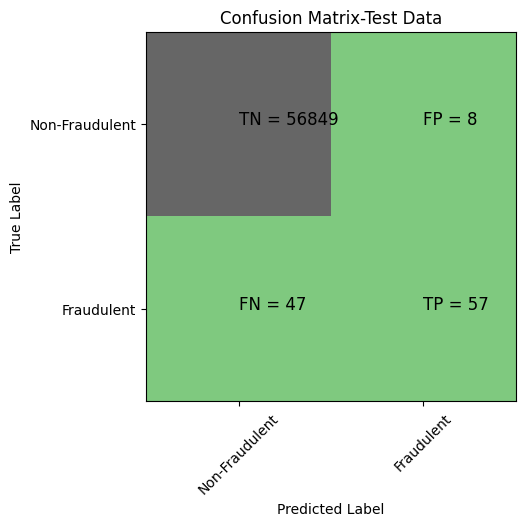

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.88      0.55      0.67       104

    accuracy                           1.00     56961
   macro avg       0.94      0.77      0.84     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of logistic model with l2 regularization:0.9981741893576307
Confusion Metrix


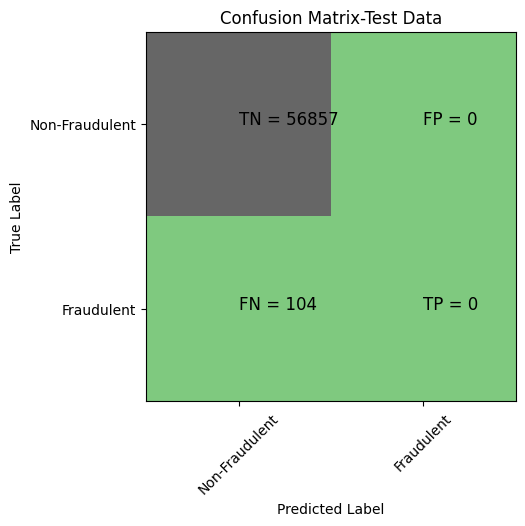

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.00      0.00      0.00       104

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc-value:0.5640824957619723
l2 threshold:0.4992778950526748
ROC for the test dataset 56.4%


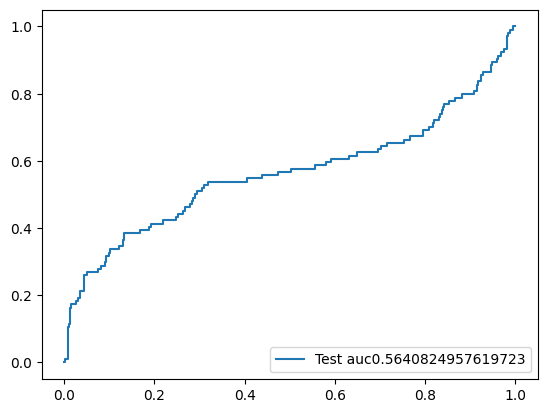

l1 roc-value:0.8954375755099502
l2 threshold:0.04922562246238292
ROC for the test dataset 89.5%


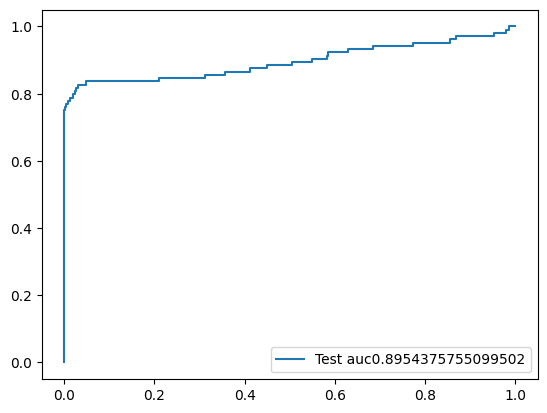

Time taken by model:---118.54129958152771 seconds---
------------------------------------------------------------
KNN Model
model score
0.9991397622934991
Confusion Matrix


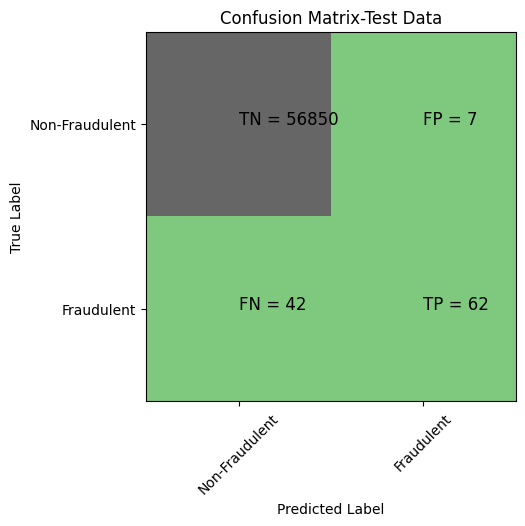

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.90      0.60      0.72       104

    accuracy                           1.00     56961
   macro avg       0.95      0.80      0.86     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc value: 0.874745904367367
KNN threshold: 0.2
Roc for the dataset 87.5%


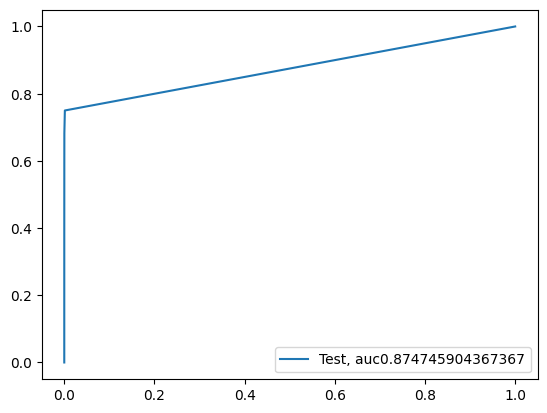

Time taken by model:---285.6300332546234 seconds---
------------------------------------------------------------
Decision Tree Model with gini and entropy criterion
giniscore:0.9991046505503766
Confusion Matrix


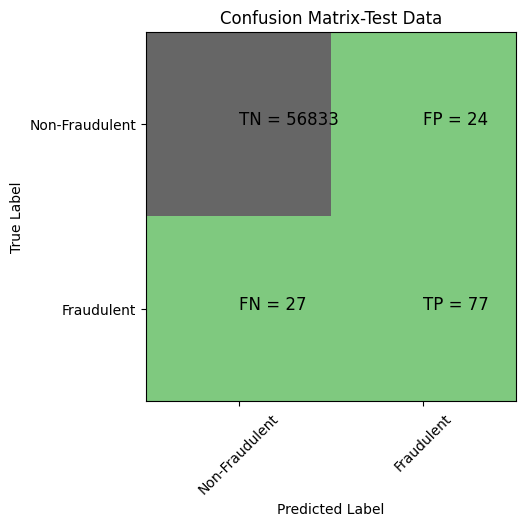

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.76      0.74      0.75       104

    accuracy                           1.00     56961
   macro avg       0.88      0.87      0.88     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value:0.8699812518856349
KNN threshold: 1.0
ROC for the test dataset 87.0%


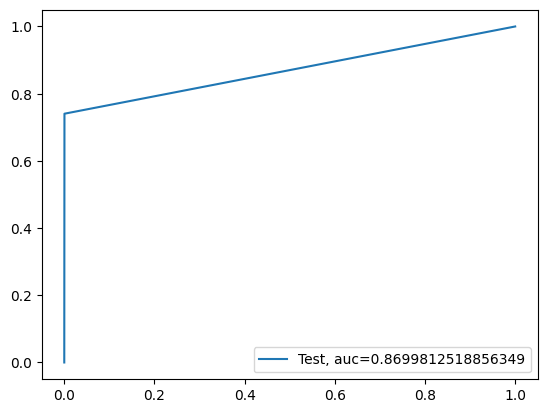

Time taken by model:---31.159361839294434 seconds---
------------------------------------------------------------
Random Forest Model 
Model Accuracy: 0.9995435473394076
Confusion Matrix


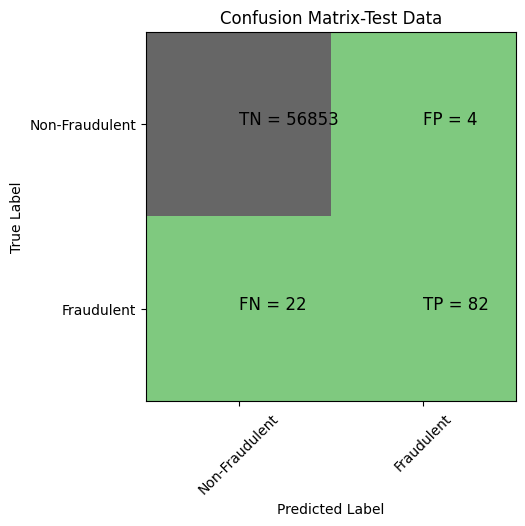

Classification Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.95      0.79      0.86       104

    accuracy                           1.00     56961
   macro avg       0.98      0.89      0.93     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value:0.9555007096075038
Random Forest threshold: 0.02
ROC for the test dataset 95.6%


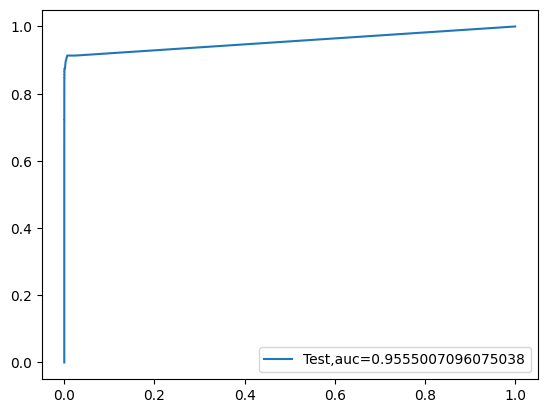

Time taken by model:---328.53444719314575 seconds---
------------------------------------------------------------
XGBoost Model
Model Accuracy:0.9995259914678464
Confusion Matrix


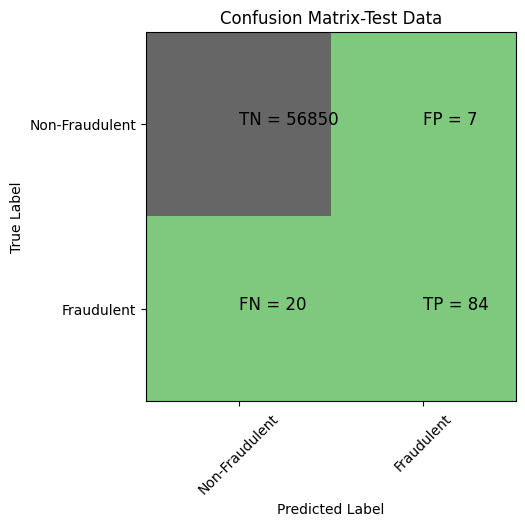

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.92      0.81      0.86       104

    accuracy                           1.00     56961
   macro avg       0.96      0.90      0.93     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9920651134222022
XGBoost threshold: 0.0006036693812347949
ROC for the test dataset 99.2%


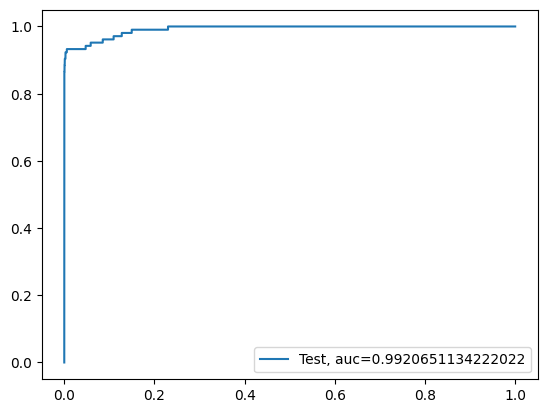

Time taken by model:---335.23033380508423 seconds---
------------------------------------------------------------
SVM Model with sigmoid kernel
Accuracy score: 0.9981741893576307
Confusion Matrix


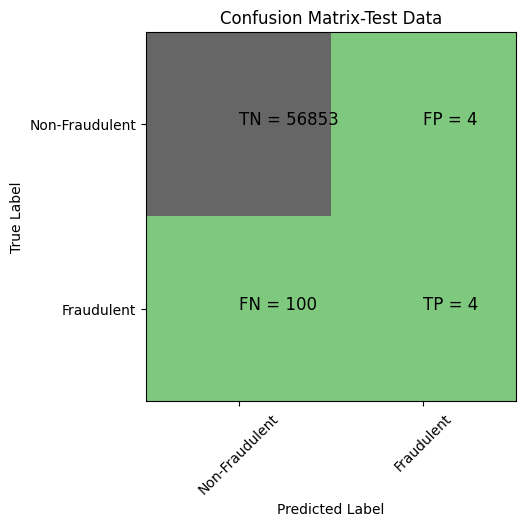

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56857
           1       0.50      0.04      0.07       104

    accuracy                           1.00     56961
   macro avg       0.75      0.52      0.54     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc value: 0.45391085733303926
SVM threshold: 0.004292400371966247
ROC for the test dataset 45.4%


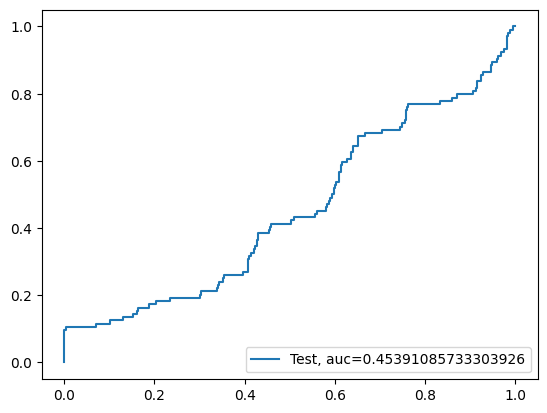

Time taken by model:---526.257462978363 seconds---
------------------------------------------------------------


In [ ]:
#Run logistic regression with L1 and L2 Regularization
print('Logistic Regression with L1 and L2 regularization')
start_time=time.time()
df_Results=buildAndRunLogisticModels(df_Results,'RepeatedKFold Cross Validation',X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run knn model
print('KNN Model')
start_time=time.time()
df_Results=buildAndRunKNNModels(df_Results,'RepeatedKFold Cross Validation',X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run decision tree models with 'gini' and 'entropy' criteria
print('Decision Tree Model with gini and entropy criterion')
start_time=time.time()
df_Results=buildAndRunTreeModels(df_Results,'RepeatedKFold Cross Validation',X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run random forest model
print('Random Forest Model ')
df_Results=buildAndRunRandomForestModels(df_Results,'RepeatedKFold Cross Validation',X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#Run XGBoost Model
print('XGBoost Model')
df_Results=buildAndRunXGBoostModels(df_Results,'RepeatedKFold Cross Validation',X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)


#Run SVM Model
print('SVM Model with sigmoid kernel')
df_Results=buildAndRunSVMModels(df_Results,'RepeatedKFold Cross Validation',X_train_cv,y_train_cv,X_test_cv,y_test_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)




In [ ]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998174,0.564082,0.499278
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.999034,0.895438,0.049226
2,RepeatedKFold Cross Validation,KNN,0.999140,0.874746,0.200000
3,RepeatedKFold Cross Validation,Tree model with gini criteria,0.999105,0.869981,1.000000
4,RepeatedKFold Cross Validation,Random Forest,0.999544,0.955501,0.020000
5,RepeatedKFold Cross Validation,XGBoost,0.999526,0.992065,0.000604
6,RepeatedKFold Cross Validation,SVM,0.998174,0.453911,0.004292


####Perform cross validation with StratifiedKFold

In [ ]:
#Lets perform StratifiedKFold and check the results
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=None)
#X is the feature set and y is the target variable
for train_index,test_index in skf.split(X,y):
  print("TRAIN:",train_index,"TEST:",test_index)
  X_train_SKF_cv,X_test_SKF_cv=X.iloc[train_index],X.iloc[test_index]
  y_train_SKF_cv,y_test_SKF_cv=y.iloc[train_index],y.iloc[test_index]



TRAIN: [ 30473  30496  31002 ... 284804 284805 284806] TEST: [    0     1     2 ... 57017 57018 57019]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 30473  30496  31002 ... 113964 113965 113966]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [ 81609  82400  83053 ... 170946 170947 170948]
TRAIN: [     0      1      2 ... 284804 284805 284806] TEST: [150654 150660 150661 ... 227866 227867 227868]
TRAIN: [     0      1      2 ... 227866 227867 227868] TEST: [212516 212644 213092 ... 284804 284805 284806]


Logistic Regression with L1 and L2 regularization
Max auc_roc for l1: 0.9652106893977332
Max auc_roc for l2: 0.5597020083683936
Parameters for L1 regularizations
[[-0.03660539 -0.1358827  -0.20474594  0.04333662 -0.24034598  0.08416903
   0.12654905 -0.04815306 -0.14258132 -0.1384162  -0.11668372  0.05505155
  -0.15637116 -0.24216184 -0.03137093 -0.09904364 -0.23133976  0.05582481
   0.02122044  0.20503748  0.09013502  0.00148754 -0.03796378 -0.00392139
  -0.14797782 -0.00701001 -0.06594801 -0.00660368 -0.00656465 -0.12981985]]
[-2.0409044]
{1: array([[0.5       , 0.5       , 0.5       , 0.5       , 0.48341269,
        0.44979055, 0.48500892, 0.78098262, 0.9497821 , 0.94525947,
        0.91827811, 0.91446679, 0.94989144, 0.94933682, 0.94178407,
        0.94900653, 0.92481293, 0.94421561, 0.9164553 , 0.97793244],
       [0.5       , 0.5       , 0.5       , 0.5       , 0.54612019,
        0.57709187, 0.60597219, 0.84651057, 0.93343227, 0.93465714,
        0.92629828, 0.92557122, 0.944815

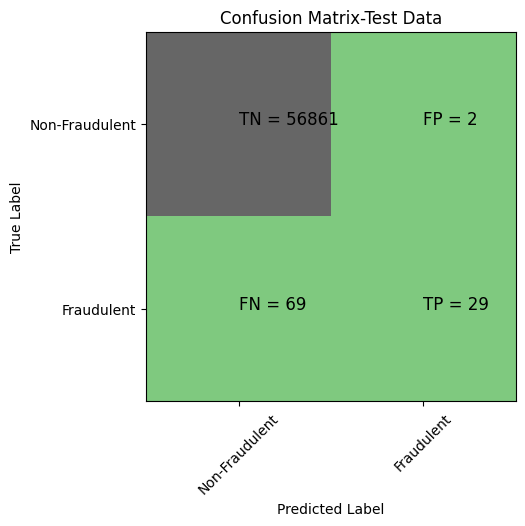

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.94      0.30      0.45        98

    accuracy                           1.00     56961
   macro avg       0.97      0.65      0.72     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of logistic model with l2 regularization:0.9982795245869981
Confusion Metrix


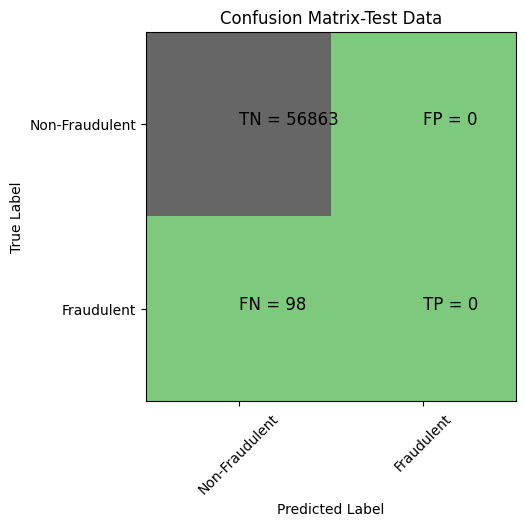

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc-value:0.6111619154810686
l2 threshold:0.499392195772867
ROC for the test dataset 61.1%


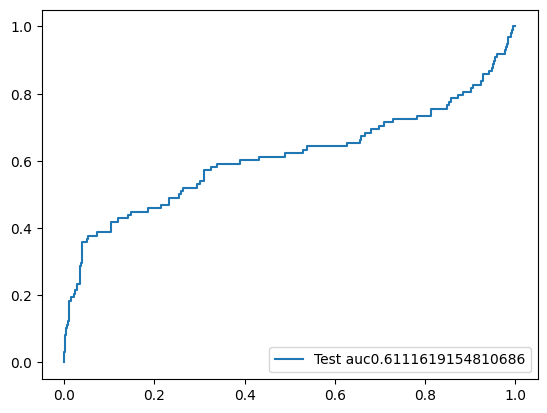

l1 roc-value:0.8890758561483437
l2 threshold:0.0210874927677922
ROC for the test dataset 88.9%


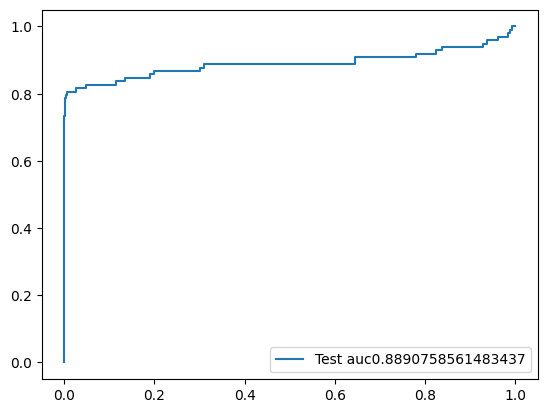

Time taken by model:---120.17881107330322 seconds---
------------------------------------------------------------
KNN Model
model score
0.9991924299081828
Confusion Matrix


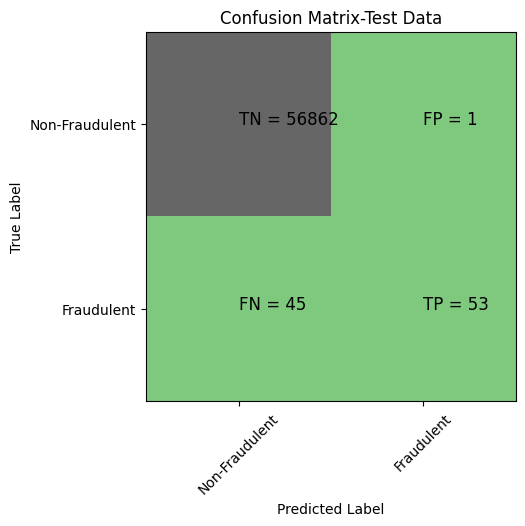

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.98      0.54      0.70        98

    accuracy                           1.00     56961
   macro avg       0.99      0.77      0.85     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc value: 0.8057457828285457
KNN threshold: 0.2
Roc for the dataset 80.6%


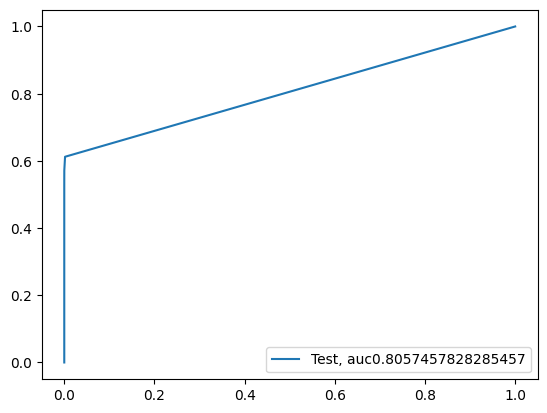

Time taken by model:---287.09724020957947 seconds---
------------------------------------------------------------
Decision Tree Model with gini and entropy criterion
giniscore:0.998841312476958
Confusion Matrix


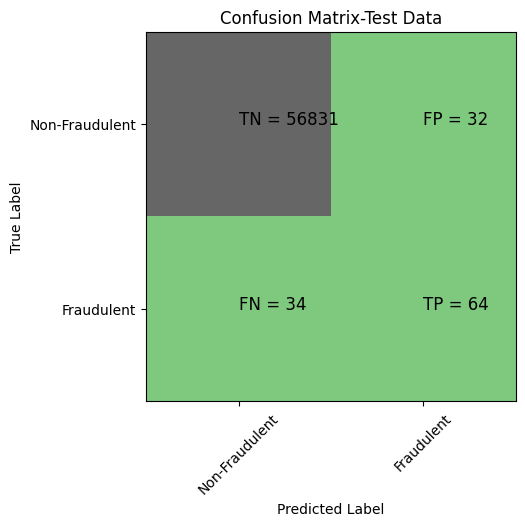

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.67      0.65      0.66        98

    accuracy                           1.00     56961
   macro avg       0.83      0.83      0.83     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value:0.8262492341959029
KNN threshold: 1.0
ROC for the test dataset 82.6%


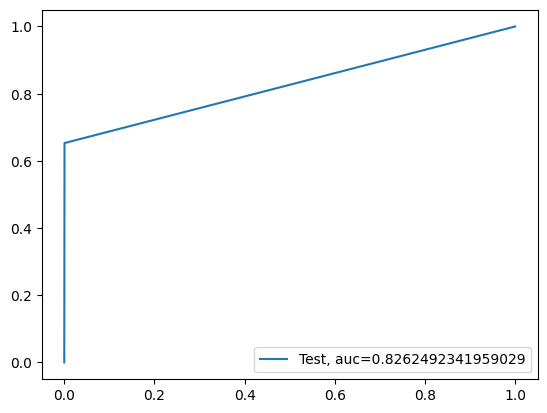

Time taken by model:---27.35457706451416 seconds---
------------------------------------------------------------
Random Forest Model 
Model Accuracy: 0.9994382121100402
Confusion Matrix


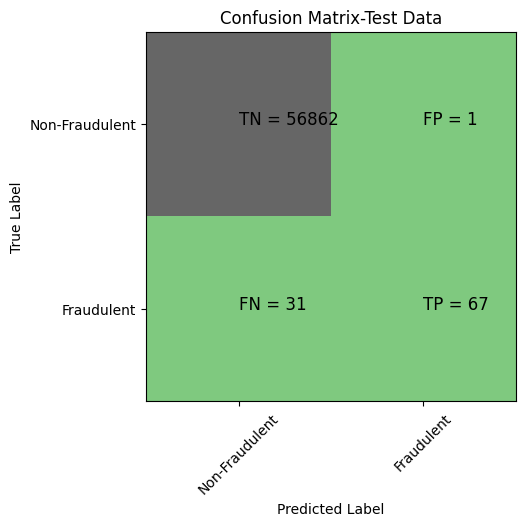

Classification Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.68      0.81        98

    accuracy                           1.00     56961
   macro avg       0.99      0.84      0.90     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value:0.9464721329855826
Random Forest threshold: 0.01
ROC for the test dataset 94.6%


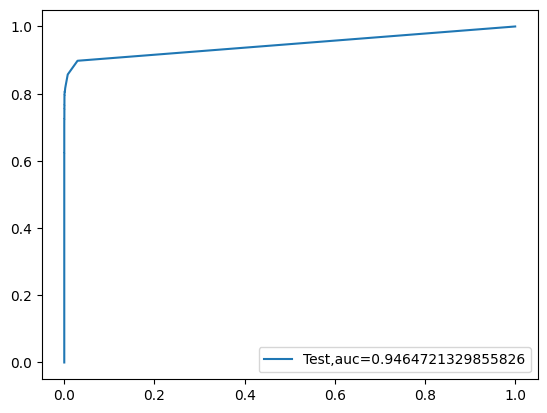

Time taken by model:---297.2319824695587 seconds---
------------------------------------------------------------
XGBoost Model
Model Accuracy:0.9994382121100402
Confusion Matrix


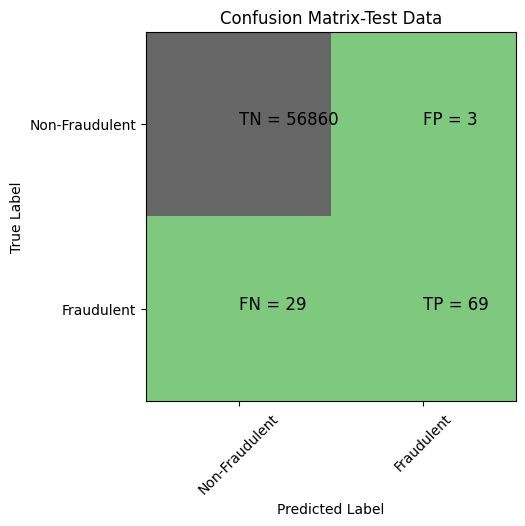

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.96      0.70      0.81        98

    accuracy                           1.00     56961
   macro avg       0.98      0.85      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9722049451474309
XGBoost threshold: 3.768169699469581e-05
ROC for the test dataset 97.2%


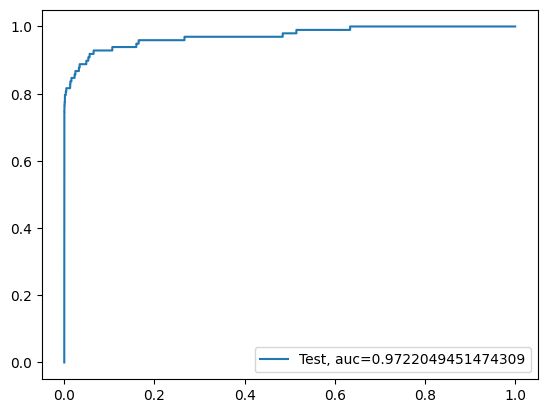

Time taken by model:---305.04029417037964 seconds---
------------------------------------------------------------
SVM Model with sigmoid kernel
Accuracy score: 0.9982795245869981
Confusion Matrix


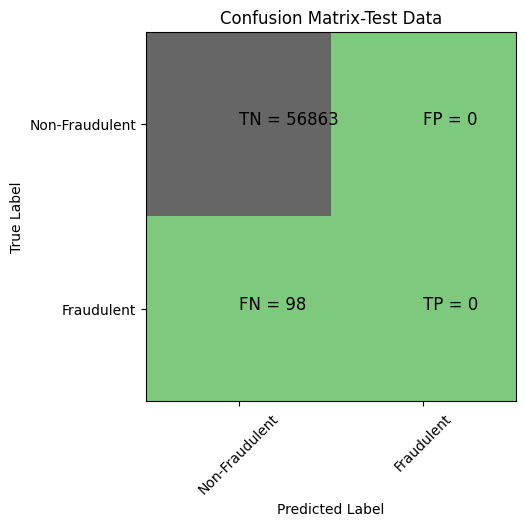

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

SVM roc value: 0.40177034885494567
SVM threshold: 0.002708179070154349
ROC for the test dataset 40.2%


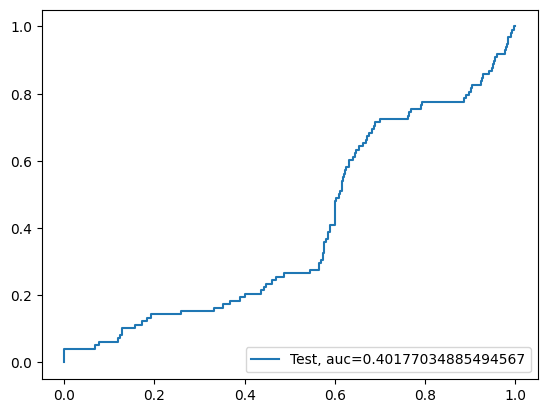

Time taken by model:---1107.9745786190033 seconds---
------------------------------------------------------------


In [ ]:
#Run logistic regression with L1 and L2 Regularization
print('Logistic Regression with L1 and L2 regularization')
start_time=time.time()
df_Results=buildAndRunLogisticModels(df_Results,'StratifiedKFold Cross Validation',X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run knn model
print('KNN Model')
start_time=time.time()
df_Results=buildAndRunKNNModels(df_Results,'StratifiedKFold Cross Validation',X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run decision tree models with 'gini' and 'entropy' criteria
print('Decision Tree Model with gini and entropy criterion')
start_time=time.time()
df_Results=buildAndRunTreeModels(df_Results,'StratifiedKFold Cross Validation',X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run random forest model
print('Random Forest Model ')
df_Results=buildAndRunRandomForestModels(df_Results,'StratifiedKFold Cross Validation',X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#Run XGBoost Model
print('XGBoost Model')
df_Results=buildAndRunXGBoostModels(df_Results,'StratifiedKFold Cross Validation',X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)


#Run SVM Model
print('SVM Model with sigmoid kernel')
df_Results=buildAndRunSVMModels(df_Results,'StratifiedKFold Cross Validation',X_train_SKF_cv,y_train_SKF_cv,X_test_SKF_cv,y_test_SKF_cv)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)




In [ ]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998174,0.564082,0.499278
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.999034,0.895438,0.049226
2,RepeatedKFold Cross Validation,KNN,0.999140,0.874746,0.200000
3,RepeatedKFold Cross Validation,Tree model with gini criteria,0.999105,0.869981,1.000000
4,RepeatedKFold Cross Validation,Random Forest,0.999544,0.955501,0.020000
5,RepeatedKFold Cross Validation,XGBoost,0.999526,0.992065,0.000604
6,RepeatedKFold Cross Validation,SVM,0.998174,0.453911,0.004292
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998280,0.611162,0.499392
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000


Based on the analysis of models trained using RepeatedKFold and StratifiedKFold Cross Validation, the best-performing models in terms of both accuracy and ROC AUC score are XGBoost and Random Forest.

XGBoost consistently shows the highest ROC AUC score across both validation methods (0.992065 in RepeatedKFold and 0.972205 in StratifiedKFold) and has a very high accuracy (~0.9995).

Therefore, XGBoost is the top model to focus on due to its ability to distinguish between classes effectively, especially in cases where imbalanced data might skew results.

####**Model Building With Balancing Classes**

Perform class balancing with :

*   Random Oversampling
*   SMOTE
*   ADASYN

####Oversampling with Random Oversampling with StratifiedKFold cross validation



In [ ]:
# Creating the dataset with RandomOversampler with StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler

skf=StratifiedKFold(n_splits=5,random_state=None)

for fold,(train_index,test_index) in enumerate(skf.split(X,y),1):
  X_train=X.loc[train_index]
  y_train=y.loc[train_index]
  X_test=X.loc[test_index]
  y_test=y.loc[test_index]
  ROS=RandomOverSampler(sampling_strategy=0.5)
  X_over,y_over=ROS.fit_resample(X_train,y_train)

X_over=pd.DataFrame(data=X_over,columns=cols)


Logistic Regression with L1 and L2 regularization
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.5
Parameters for L1 regularizations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

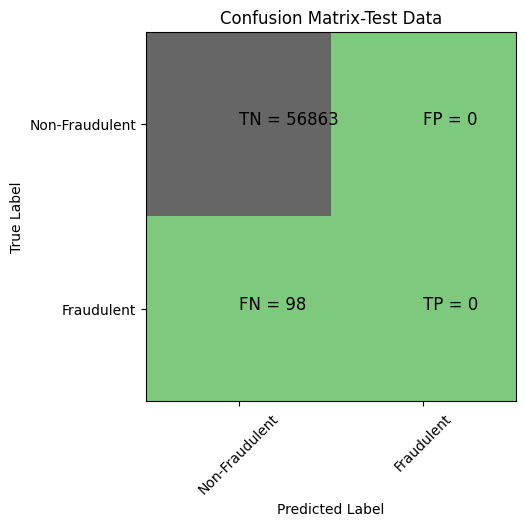

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of logistic model with l2 regularization:0.9982795245869981
Confusion Metrix


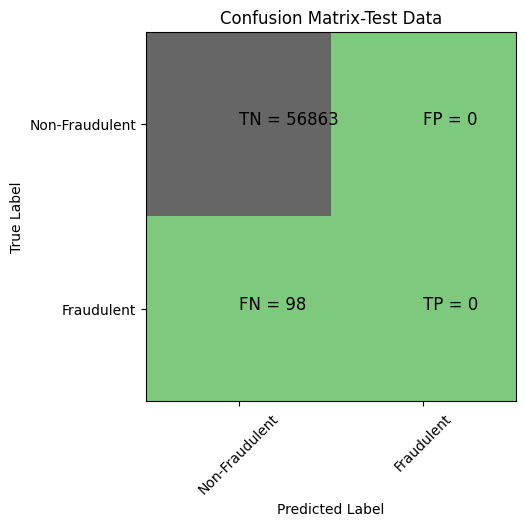

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc-value:0.5
l2 threshold:inf
ROC for the test dataset 50.0%


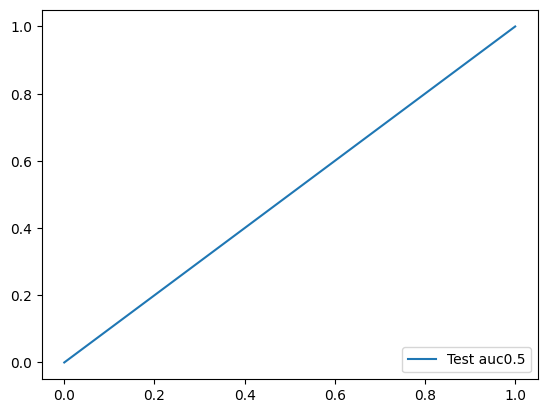

l1 roc-value:0.5
l2 threshold:inf
ROC for the test dataset 50.0%


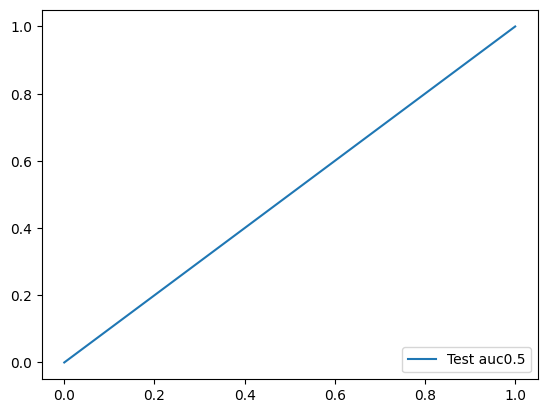

Time taken by model:---133.79164791107178 seconds---
------------------------------------------------------------
KNN Model
model score
0.9980688541282632
Confusion Matrix


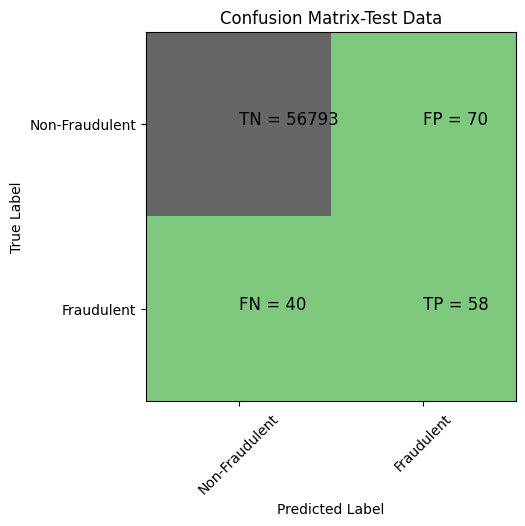

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.45      0.59      0.51        98

    accuracy                           1.00     56961
   macro avg       0.73      0.80      0.76     56961
weighted avg       1.00      1.00      1.00     56961

KNN roc value: 0.805604465728046
KNN threshold: 0.2
Roc for the dataset 80.6%


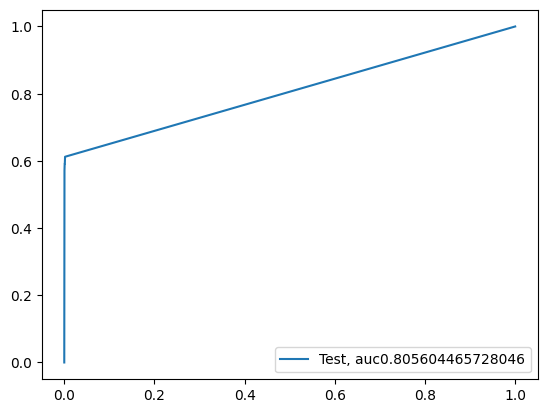

Time taken by model:---426.5733337402344 seconds---
------------------------------------------------------------
Decision Tree Model with gini and entropy criterion
giniscore:0.9992275416513052
Confusion Matrix


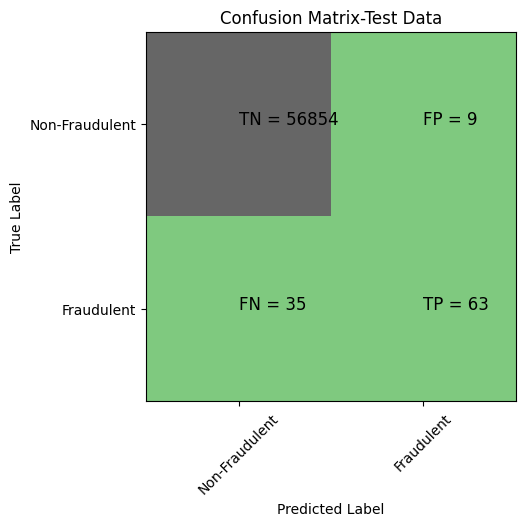

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.88      0.64      0.74        98

    accuracy                           1.00     56961
   macro avg       0.94      0.82      0.87     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value:0.8213494338522916
KNN threshold: 1.0
ROC for the test dataset 82.1%


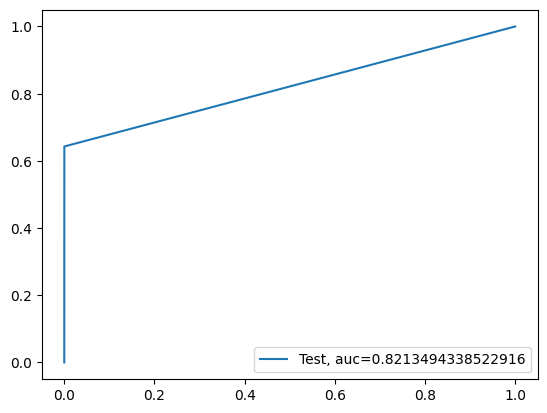

Time taken by model:---25.004218101501465 seconds---
------------------------------------------------------------
Random Forest Model 
Model Accuracy: 0.999490879724724
Confusion Matrix


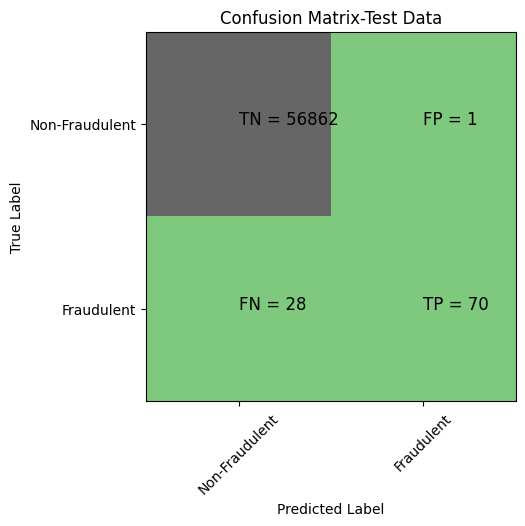

Classification Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.99      0.71      0.83        98

    accuracy                           1.00     56961
   macro avg       0.99      0.86      0.91     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value:0.9355271908457383
Random Forest threshold: 0.01
ROC for the test dataset 93.6%


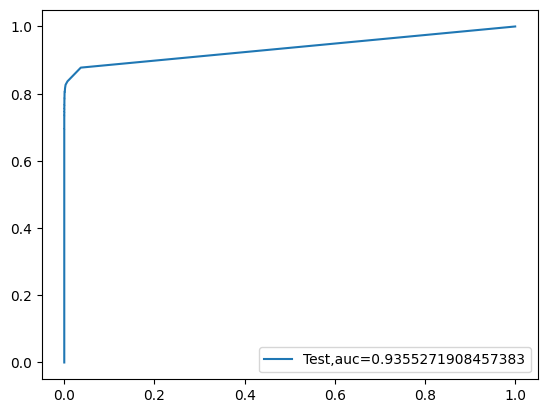

Time taken by model:---254.7526297569275 seconds---
------------------------------------------------------------
XGBoost Model
Model Accuracy:0.9994733238531627
Confusion Matrix


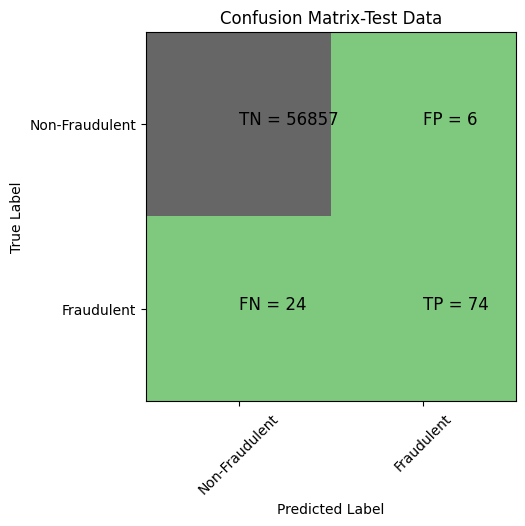

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.76      0.83        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9757001880997901
XGBoost threshold: 0.0002354954631300643
ROC for the test dataset 97.6%


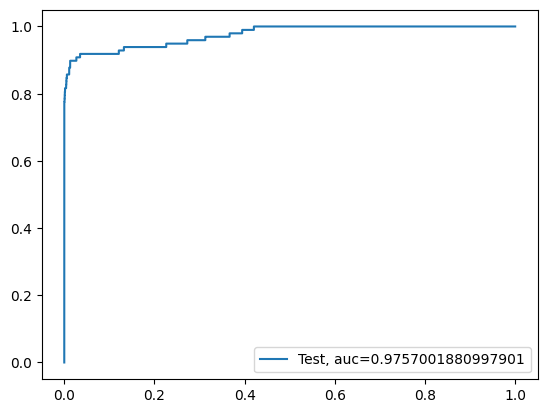

Time taken by model:---264.95309376716614 seconds---
------------------------------------------------------------


In [ ]:
Data_Imbalance_Handling="Random Oversampling with StratifiedKFold CV"
#Run logistic regression with L1 and L2 Regularization
print('Logistic Regression with L1 and L2 regularization')
start_time=time.time()
df_Results=buildAndRunLogisticModels(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run knn model
print('KNN Model')
start_time=time.time()
df_Results=buildAndRunKNNModels(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run decision tree models with 'gini' and 'entropy' criteria
print('Decision Tree Model with gini and entropy criterion')
start_time=time.time()
df_Results=buildAndRunTreeModels(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run random forest model
print('Random Forest Model ')
df_Results=buildAndRunRandomForestModels(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#Run XGBoost Model
print('XGBoost Model')
df_Results=buildAndRunXGBoostModels(df_Results,Data_Imbalance_Handling,X_over,y_over,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

In [ ]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998174,0.564082,0.499278
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.999034,0.895438,0.049226
2,RepeatedKFold Cross Validation,KNN,0.999140,0.874746,0.200000
3,RepeatedKFold Cross Validation,Tree model with gini criteria,0.999105,0.869981,1.000000
4,RepeatedKFold Cross Validation,Random Forest,0.999544,0.955501,0.020000
5,RepeatedKFold Cross Validation,XGBoost,0.999526,0.992065,0.000604
6,RepeatedKFold Cross Validation,SVM,0.998174,0.453911,0.004292
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998280,0.611162,0.499392
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000


####**Result for Random Oversampling with StratifiedKFold technique**
Looking at the accuracy and ROC value we have XGBoost which has provided best results for Random Oversampling and StratifiedKFold technique

####**Oversampling with SMOTE oversampling**
*   We will use SMOTE Oversampling method to handle the class imbalance.




In [ ]:
#creating dataframe with smote and stratifiedkfold
from sklearn.model_selection import StratifiedKFold
from imblearn import over_sampling
skf=StratifiedKFold(n_splits=5,random_state=None)

for fold,(train_index,test_index) in enumerate(skf.split(X,y),1):
  X_train=X.loc[train_index]
  y_train=y.loc[train_index]
  X_test=X.loc[test_index]
  y_test=y.loc[test_index]
  SMOTE=over_sampling.SMOTE(random_state=0)
  X_train_Smote,y_train_Smote=SMOTE.fit_resample(X_train,y_train)

  X_train_Smote=pd.DataFrame(data=X_train_Smote,columns=cols)







Logistic Regression with L1 and L2 regularization
Max auc_roc for l1: 0.5
Max auc_roc for l2: 0.5
Parameters for L1 regularizations
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0.]]
[0.]
{1: array([[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
        0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5

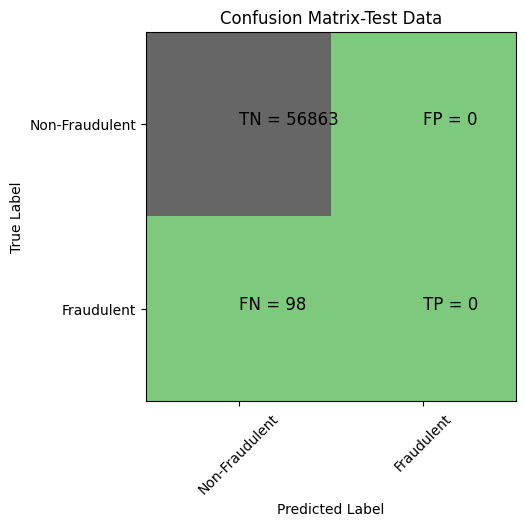

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

Accuracy of logistic model with l2 regularization:0.9982795245869981
Confusion Metrix


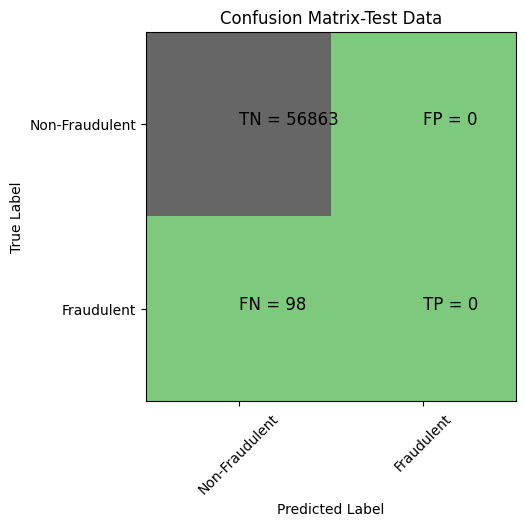

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56961
   macro avg       0.50      0.50      0.50     56961
weighted avg       1.00      1.00      1.00     56961

l2 roc-value:0.5
l2 threshold:inf
ROC for the test dataset 50.0%


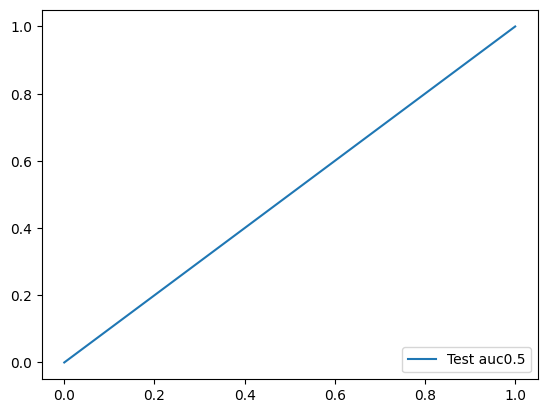

l1 roc-value:0.5
l2 threshold:inf
ROC for the test dataset 50.0%


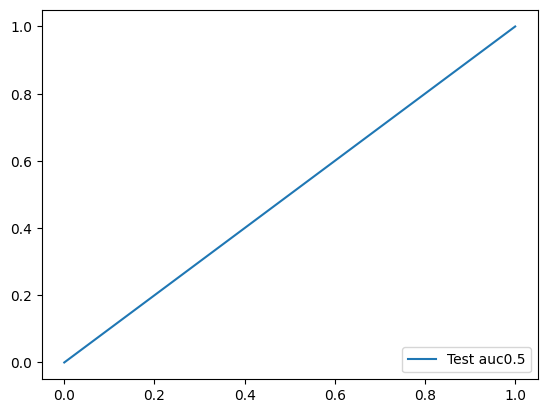

Time taken by model:---172.78940224647522 seconds---
------------------------------------------------------------
KNN Model
model score
0.9946805709169432
Confusion Matrix


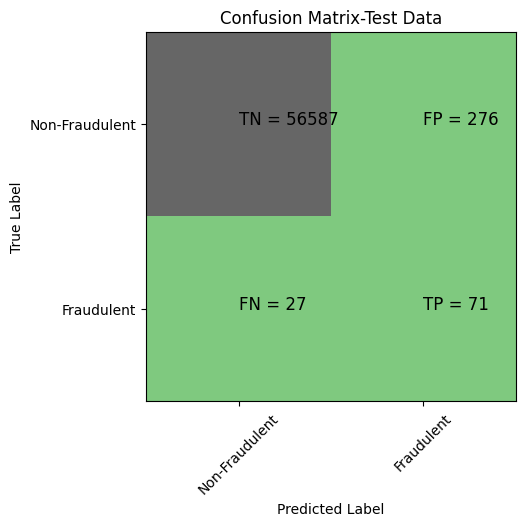

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.20      0.72      0.32        98

    accuracy                           0.99     56961
   macro avg       0.60      0.86      0.66     56961
weighted avg       1.00      0.99      1.00     56961

KNN roc value: 0.8602674455287628
KNN threshold: 0.6
Roc for the dataset 86.0%


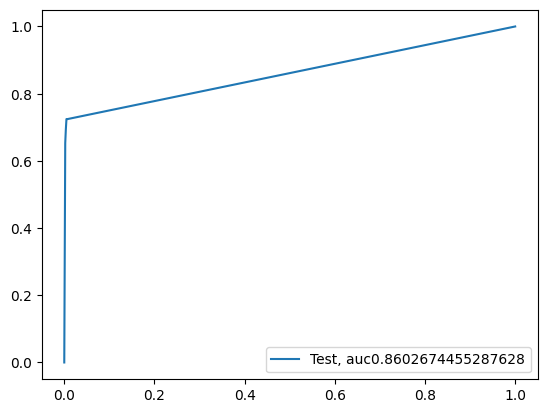

Time taken by model:---555.1560723781586 seconds---
------------------------------------------------------------
Decision Tree Model with gini and entropy criterion
giniscore:0.9977528484401608
Confusion Matrix


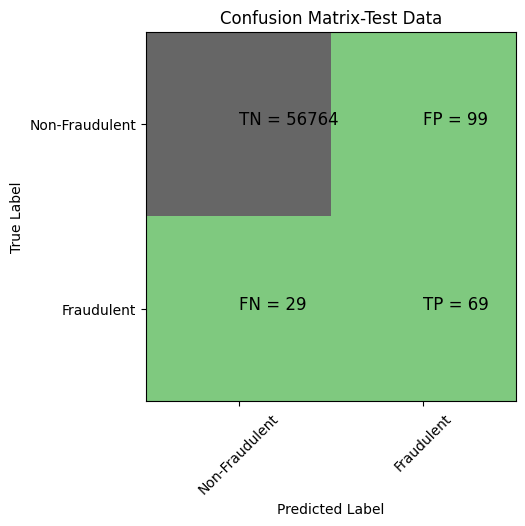

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.41      0.70      0.52        98

    accuracy                           1.00     56961
   macro avg       0.71      0.85      0.76     56961
weighted avg       1.00      1.00      1.00     56961

ginitree_roc_value:0.8511703029874526
KNN threshold: 1.0
ROC for the test dataset 85.1%


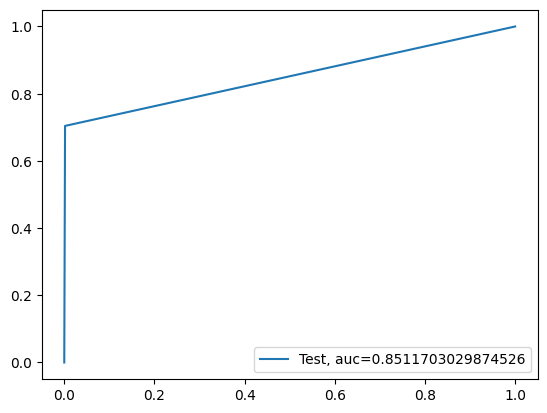

Time taken by model:---71.34077596664429 seconds---
------------------------------------------------------------
Random Forest Model 
Model Accuracy: 0.999490879724724
Confusion Matrix


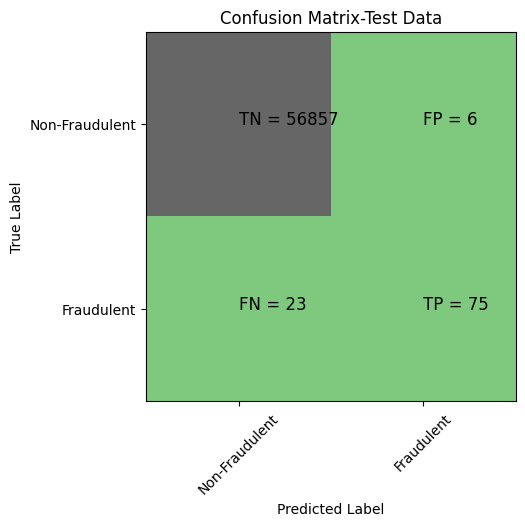

Classification Matrix
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.93      0.77      0.84        98

    accuracy                           1.00     56961
   macro avg       0.96      0.88      0.92     56961
weighted avg       1.00      1.00      1.00     56961

Random Forest roc_value:0.9614705879186172
Random Forest threshold: 0.05
ROC for the test dataset 96.1%


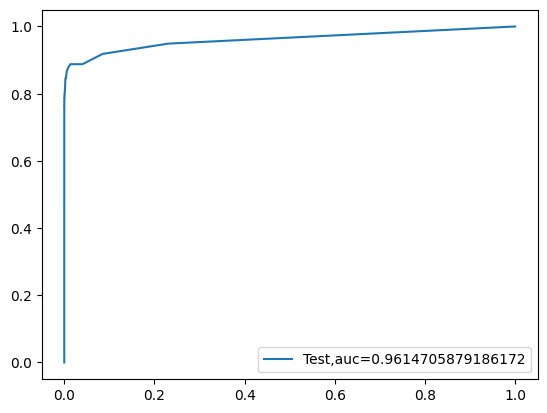

Time taken by model:---591.6947915554047 seconds---
------------------------------------------------------------
XGBoost Model
Model Accuracy:0.9994031003669177
Confusion Matrix


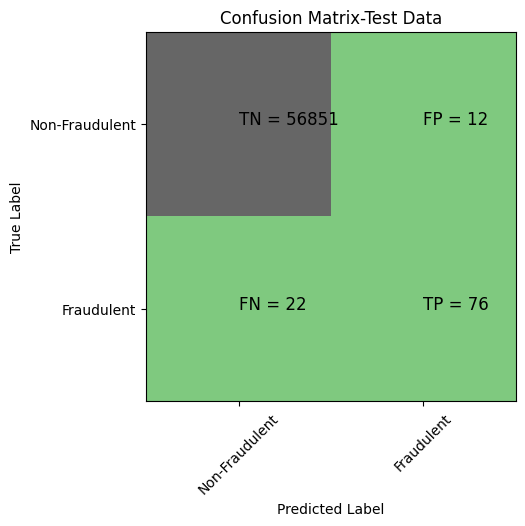

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.86      0.78      0.82        98

    accuracy                           1.00     56961
   macro avg       0.93      0.89      0.91     56961
weighted avg       1.00      1.00      1.00     56961

XGBoost roc_value: 0.9704732498841648
XGBoost threshold: 0.00014416704652830958
ROC for the test dataset 97.0%


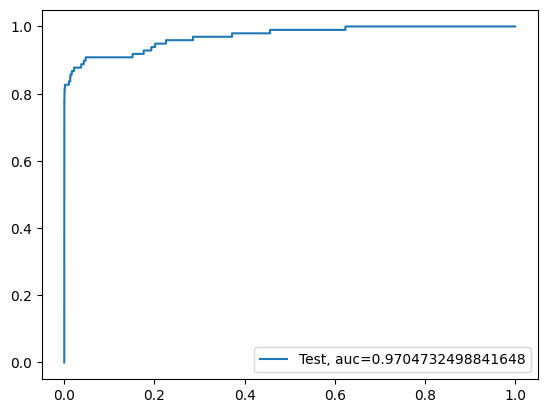

Time taken by model:---603.7731907367706 seconds---
------------------------------------------------------------


In [ ]:
Data_Imbalance_Handling="SMOTE Oversampling with StratifiedKFold CV"
#Run logistic regression with L1 and L2 Regularization
print('Logistic Regression with L1 and L2 regularization')
start_time=time.time()
df_Results=buildAndRunLogisticModels(df_Results,Data_Imbalance_Handling,X_train_Smote,y_train_Smote,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run knn model
print('KNN Model')
start_time=time.time()
df_Results=buildAndRunKNNModels(df_Results,Data_Imbalance_Handling,X_train_Smote,y_train_Smote,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run decision tree models with 'gini' and 'entropy' criteria
print('Decision Tree Model with gini and entropy criterion')
start_time=time.time()
df_Results=buildAndRunTreeModels(df_Results,Data_Imbalance_Handling,X_train_Smote,y_train_Smote,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#run random forest model
print('Random Forest Model ')
df_Results=buildAndRunRandomForestModels(df_Results,Data_Imbalance_Handling,X_train_Smote,y_train_Smote,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

#Run XGBoost Model
print('XGBoost Model')
df_Results=buildAndRunXGBoostModels(df_Results,Data_Imbalance_Handling,X_train_Smote,y_train_Smote,X_test,y_test)
print('Time taken by model:---%s seconds---'%(time.time()-start_time))
print('-'*60)

In [ ]:
df_Results

,Methodology,Model,Accuracy,roc_value,threshold
0,RepeatedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998174,0.564082,0.499278
1,RepeatedKFold Cross Validation,Logistic Regression with L1 Regularization,0.999034,0.895438,0.049226
2,RepeatedKFold Cross Validation,KNN,0.999140,0.874746,0.200000
3,RepeatedKFold Cross Validation,Tree model with gini criteria,0.999105,0.869981,1.000000
4,RepeatedKFold Cross Validation,Random Forest,0.999544,0.955501,0.020000
5,RepeatedKFold Cross Validation,XGBoost,0.999526,0.992065,0.000604
6,RepeatedKFold Cross Validation,SVM,0.998174,0.453911,0.004292
7,StratifiedKFold Cross Validation,Logistic Regression with L2 Regularization,0.998280,0.611162,0.499392
8,StratifiedKFold Cross Validation,Logistic Regression with L1 Regularization,0.998754,0.889076,0.021087
9,StratifiedKFold Cross Validation,KNN,0.999192,0.805746,0.200000


####**Overall Conclusion after running the models on Oversampled Data**
Lokking at the above results it seems that XGBOOST model with StratifiedKFold CV has provided the best results under the category of all oversampling techniques. So we will try to tune the hyperparameters of this model to get best results

####HyperParamter Tuning

In [ ]:
# Performing Hyperparameter Tuning
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Defining the parameter grid for hyperparameter tuning
param_test = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'n_estimators': range(60, 130, 150),
    'learning_rate': [0.05, 0.1, 0.125, 0.15, 0.2],
    'gamma': [i/10.0 for i in range(0, 5)],
    'subsample': [i/10.0 for i in range(7, 10)],
    'colsample_bytree': [i/10.0 for i in range(7, 10)]
}

# Setting up the RandomizedSearchCV
gsearch1 = RandomizedSearchCV(
    estimator=XGBClassifier(
        booster='gbtree',
        colsample_bylevel=1,
        colsample_bynode=1,
        max_delta_step=0,
        missing=None,
        n_jobs=-1,
        objective='binary:logistic',
        random_state=42,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        verbosity=1
    ),
    param_distributions=param_test,
    n_iter=5,  # Number of parameter settings sampled
    scoring='roc_auc',  # Metric used for evaluation
    n_jobs=-1,  # Use all cores
    cv=5  # 5-fold cross-validation
)

# Fitting the model on the oversampled data (assuming X_over, y_over are defined)
gsearch1.fit(X_over, y_over)

# Extracting the results
print(gsearch1.cv_results_)
print("Best Parameters:", gsearch1.best_params_)
print("Best Score:", gsearch1.best_score_)


{'mean_fit_time': array([8.11516881, 8.74051256, 7.06861486, 7.54343138, 7.02729816]), 'std_fit_time': array([0.245964  , 0.25434292, 1.05292791, 1.26271707, 1.54382841]), 'mean_score_time': array([0.02841029, 0.02087235, 0.0209444 , 0.0210187 , 0.02932668]), 'std_score_time': array([0.01010287, 0.00513014, 0.00696671, 0.00824823, 0.01726811]), 'param_subsample': masked_array(data=[0.8, 0.9, 0.8, 0.8, 0.9],
             mask=[False, False, False, False, False],
       fill_value=1e+20), 'param_n_estimators': masked_array(data=[60, 60, 60, 60, 60],
             mask=[False, False, False, False, False],
       fill_value=999999), 'param_min_child_weight': masked_array(data=[3, 3, 1, 1, 3],
             mask=[False, False, False, False, False],
       fill_value=999999), 'param_max_depth': masked_array(data=[7, 9, 5, 5, 3],
             mask=[False, False, False, False, False],
       fill_value=999999), 'param_learning_rate': masked_array(data=[0.125, 0.1, 0.125, 0.05, 0.05],
           

In [ ]:
#creating XGBoost model with selected parameters
from xgboost import XGBClassifier
clf=XGBClassifier(base_score=0.5,booster='gbtree',colsample_bylevel=1,
                  colsample_bynode=1,colsample_bytree=0.7,gamma=0.3,
                  learning_rate=0.125,max_delta_step=0,max_depth=7,
                  min_child_weight=5,n_estimators=60,n_jobs=-1,
                  nthread=None,objective='binary:logistic',random_state=42,
                  reg_alpha=0,reg_lambda=1,scale_pos_weight=1,seed=None,
                  silent=None,subsample=0.8,verbosity=1
                  )
#fit on the dataset
clf.fit(X_over,y_over)
XGB_test_score=clf.score(X_test,y_test)
print('Model Accuracy:{0}'.format(XGB_test_score))

#Probabilites for each class
XGB_probs=clf.predict_proba(X_test)[:,1]

#calculate roc auc
XGB_roc_value=roc_auc_score(y_test,XGB_probs)
print('XGBoost roc value :{0}'.format(XGB_roc_value))
fpr,tpr,thresholds=metrics.roc_curve(y_test,XGB_probs)
threshold=thresholds[np.argmax(tpr-fpr)]
print('XGBoost threshold :{0}'.format(threshold))


Model Accuracy:0.999280209265989
XGBoost roc value :0.9791780243743735
XGBoost threshold :0.018578602001070976
